# Convert data into right form for TCRDivER

In [852]:
import os
import pandas as pd
DATA_DIR = r'G:\My Drive\Projects\Public\gastric_cancer\VIKTORY\CDR3b_data_purer'
FULLDATA_DIR = r'G:\My Drive\Projects\Public\gastric_cancer\VIKTORY\TCR_data'

# Read all csv files and store them in a list with their original names
seurat_data = []
files = [f for f in os.listdir(DATA_DIR) if f.endswith('.csv')]
for file in files:
    file_path = os.path.join(DATA_DIR, file)
    try:
        df = pd.read_csv(file_path)
        # Add the file information to the dataframe
        df.name = file.replace('.csv', '')  # Store the filename without .csv extension as an attribute
        seurat_data.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

cellranger_data = []
files = [f for f in os.listdir(FULLDATA_DIR) if f.endswith('.csv')]
for file in files:
    file_path = os.path.join(FULLDATA_DIR, file)
    try:
        df = pd.read_csv(file_path)
        # Add the file information to the dataframe
        df.name = file.replace('.csv', '')  # Store the filename without .csv extension as an attribute
        cellranger_data.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

## CDR3beta comparison

In [853]:
# Show the indices of 'seurat_data' to verify the data
print(f"Total files read: {len(seurat_data)}")
# Show the indices of 'cellranger_data' to verify the data
print(f"Total files read from full data: {len(cellranger_data)}")
# Check if there are any differences in names
set([df.name for df in cellranger_data]) - set([df.name for df in seurat_data])  

Total files read: 60
Total files read from full data: 60


set()

In [854]:
# Show some names of the dataframes
print("Names of the dataframes:")
for df in seurat_data[:5]:
    print(df.name)

Names of the dataframes:
A09B
A09F1
A10B
A10F1
A10F2


In [855]:
# Count the number of rows in each dataframe in seurat_data
row_counts = [len(df) for df in seurat_data]

# Print the count for each dataframe
for i, count in enumerate(row_counts):
    if hasattr(seurat_data[i], 'name'):
        print(f"{seurat_data[i].name}: {count} rows")
    else:
        print(f"DataFrame {i}: {count} rows")

# Calculate and print the total sum of rows
total_rows = sum(row_counts)
print(f"\nTotal number of rows across all dataframes: {total_rows}")

A09B: 4337 rows
A09F1: 3672 rows
A10B: 911 rows
A10F1: 1574 rows
A10F2: 537 rows
A11B: 1654 rows
A11F1: 873 rows
A11F2: 666 rows
A12B: 2602 rows
A12F1: 2520 rows
A12F2: 1517 rows
A14B: 1917 rows
A14F1: 1771 rows
A16B: 1314 rows
A17B: 2161 rows
A17F1: 1259 rows
A18B: 1491 rows
A18F1: 1583 rows
A18F2: 4278 rows
A19B: 2428 rows
A19F1: 1159 rows
A19F2: 1017 rows
A20B: 1429 rows
A20F2: 1054 rows
A21B: 1178 rows
A21F1: 952 rows
A21F2: 905 rows
A22B: 820 rows
A22F1: 654 rows
A22F2: 380 rows
A23B: 558 rows
A23F1: 499 rows
A23F2: 1055 rows
A24B: 699 rows
A24F1: 442 rows
A24F2: 1422 rows
A25B: 1197 rows
A26B: 250 rows
A26F1: 349 rows
A26F2: 553 rows
A27B: 467 rows
A27F1: 547 rows
A27F2: 381 rows
A28B: 507 rows
A28F2: 1492 rows
A29B: 622 rows
A29F1: 165 rows
A30B: 548 rows
A30F1: 812 rows
A30F2: 419 rows
A32B: 1563 rows
A32F1: 688 rows
A32F2: 825 rows
A33B: 941 rows
A33F1: 2095 rows
A33F2: 1924 rows
A34B: 510 rows
A34F1: 333 rows
A34F2: 1204 rows
A29F2: 542 rows

Total number of rows across all d

In [856]:
# Set option to display all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Increase display width

for df in seurat_data:
    if df.name == 'A10B':
        print(df.head())
        break  # Stop after finding the first match

# Reset display options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

               cdr3  productive_frequency frame_type             barcode
0  CATSDGDRAVYNEQFF              0.000907         In  AAACCTGGTAATAGCA-1
1   CASSEQRTGVIEQYF              0.000907         In  AAACCTGGTCCGAGTC-1
2   CASTPLGQTNQPQHF              0.001815         In  AAACCTGTCCACGCAG-1
3       CASSYSYGQYF              0.002722         In  AAACGGGCAGAGTGTG-1
4     CASSGTGVYEQYF              0.026316         In  AAAGATGGTGCAACTT-1


In [857]:
# Filter all dataframes to keep only 'TRB' chain rows
for i, df in enumerate(cellranger_data):
    # Check if the dataframe has 'chain' column
    if 'chain' in df.columns:
        # Filter dataframe but preserve the name attribute
        filtered_df = df[df['chain'] == 'TRB']
        filtered_df.name = df.name  # Transfer the name attribute
        cellranger_data[i] = filtered_df
    else:
        print(f"Warning: Dataframe {df.name} does not have a 'chain' column.")

# Print the one dataframe shape after filtering
print(f"Shape of first dataframe after filtering: {cellranger_data[1].shape}")

Shape of first dataframe after filtering: (723, 31)


In [858]:
# Count the number of rows in each dataframe in cellranger_data
row_counts = [len(df) for df in cellranger_data]

# Print the count for each dataframe
for i, count in enumerate(row_counts):
    if hasattr(cellranger_data[i], 'name'):
        print(f"{cellranger_data[i].name}: {count} rows")
    else:
        print(f"DataFrame {i}: {count} rows")

# Calculate and print the total sum of rows
total_rows = sum(row_counts)
print(f"\nTotal number of rows across all dataframes: {total_rows}")

A10F1: 1948 rows
A29F2: 723 rows
A30B: 689 rows
A30F1: 1097 rows
A30F2: 509 rows
A32B: 1845 rows
A32F1: 803 rows
A32F2: 987 rows
A33B: 1201 rows
A33F1: 2541 rows
A17F1: 1537 rows
A19F2: 1240 rows
A12F2: 1786 rows
A16B: 1611 rows
A20B: 1809 rows
A10B: 1150 rows
A18B: 1758 rows
A11B: 2471 rows
A19F1: 1389 rows
A09F1: 4700 rows
A19B: 2947 rows
A33F2: 2491 rows
A21B: 1478 rows
A14B: 2536 rows
A12F1: 3274 rows
A22B: 1165 rows
A21F2: 1215 rows
A22F1: 850 rows
A23F1: 599 rows
A23B: 710 rows
A22F2: 572 rows
A12B: 3932 rows
A21F1: 1205 rows
A23F2: 1351 rows
A14F1: 2266 rows
A26B: 317 rows
A24B: 861 rows
A24F1: 559 rows
A27B: 582 rows
A28B: 738 rows
A17B: 2665 rows
A26F1: 556 rows
A24F2: 1755 rows
A25B: 1360 rows
A27F1: 676 rows
A29F1: 202 rows
A09B: 5217 rows
A29B: 825 rows
A27F2: 488 rows
A28F2: 2016 rows
A26F2: 787 rows
A18F1: 1941 rows
A18F2: 5196 rows
A20F2: 1367 rows
A10F2: 655 rows
A11F1: 1051 rows
A11F2: 883 rows
A34B: 600 rows
A34F2: 1591 rows
A34F1: 455 rows

Total number of rows acros

In [859]:
# Create a dictionary to store frequency information
frequency_info = {}

# Get the names of dataframes in seurat_data for quick lookup
seurat_names = [df.name for df in seurat_data]

# Loop through each dataframe in cellranger_data
for cellranger_df in cellranger_data:
    cellranger_name = cellranger_df.name
    
    # Check if a dataframe with the same name exists in seurat_data
    if cellranger_name in seurat_names:
        # Find the corresponding dataframe in seurat_data
        seurat_df = next(df for df in seurat_data if df.name == cellranger_name)
        
        # Count frequency of each CDR3 sequence in both datasets
        cellranger_counts = cellranger_df['cdr3'].value_counts()
        seurat_counts = seurat_df['cdr3'].value_counts()
        
        # Total number of sequences in each dataset
        total_cellranger = len(cellranger_df)
        total_seurat = len(seurat_df)
        
        # Store information in the dictionary
        frequency_info[cellranger_name] = {
            'cellranger_total': total_cellranger,
            'seurat_total': total_seurat,
            'cellranger_unique': len(cellranger_counts),
            'seurat_unique': len(seurat_counts),
            'ratio': total_seurat / total_cellranger
        }
    else:
        # If no match is found, store just the cellranger information
        total_cellranger = len(cellranger_df)
        frequency_info[cellranger_name] = {
            'cellranger_total': total_cellranger,
            'seurat_total': 0,
            'cellranger_unique': len(cellranger_df['cdr3'].unique()),
            'seurat_unique': 0,
            'ratio': 0
        }

# Sort the dataframe names by ratio in descending order
sorted_names = sorted(frequency_info.keys(), key=lambda x: frequency_info[x]['ratio'], reverse=False)

# Print the sorted names and their frequency information
for name in sorted_names:
    info = frequency_info[name]
    print(f"{name}: Cellranger={info['cellranger_total']} sequences ({info['cellranger_unique']} unique), "
          f"Seurat={info['seurat_total']} sequences ({info['seurat_unique']} unique), "
          f"Ratio={info['ratio']:.2f}")

A26F1: Cellranger=556 sequences (422 unique), Seurat=349 sequences (274 unique), Ratio=0.63
A12B: Cellranger=3932 sequences (2234 unique), Seurat=2602 sequences (1645 unique), Ratio=0.66
A22F2: Cellranger=572 sequences (230 unique), Seurat=380 sequences (193 unique), Ratio=0.66
A11B: Cellranger=2471 sequences (864 unique), Seurat=1654 sequences (666 unique), Ratio=0.67
A28B: Cellranger=738 sequences (396 unique), Seurat=507 sequences (295 unique), Ratio=0.69
A26F2: Cellranger=787 sequences (603 unique), Seurat=553 sequences (453 unique), Ratio=0.70
A22B: Cellranger=1165 sequences (374 unique), Seurat=820 sequences (323 unique), Ratio=0.70
A34F1: Cellranger=455 sequences (353 unique), Seurat=333 sequences (264 unique), Ratio=0.73
A28F2: Cellranger=2016 sequences (1354 unique), Seurat=1492 sequences (1021 unique), Ratio=0.74
A30F1: Cellranger=1097 sequences (380 unique), Seurat=812 sequences (313 unique), Ratio=0.74
A21F2: Cellranger=1215 sequences (583 unique), Seurat=905 sequences (456

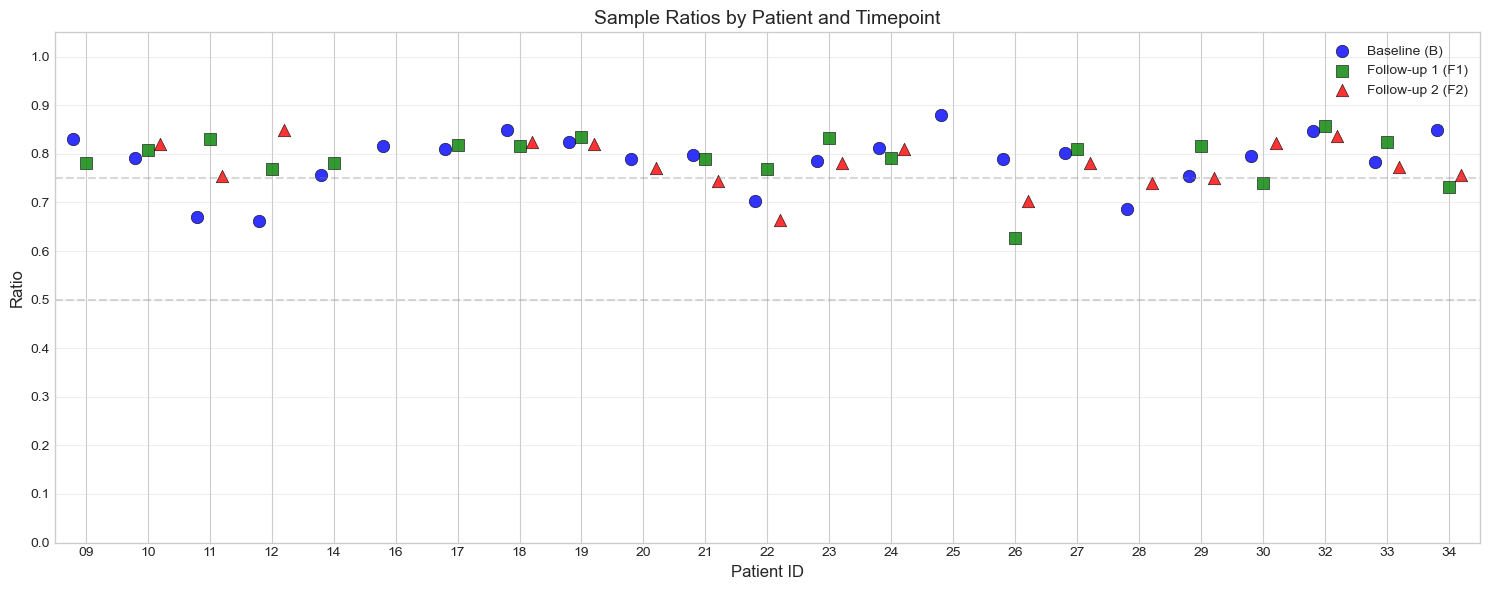

In [860]:
import numpy as np
import re

import matplotlib.pyplot as plt

# Extract patient numbers and timepoints from the dictionary keys
data = {}
for sample_name, info in frequency_info.items():
    # Extract patient number and timepoint using regex
    match = re.match(r'A(\d+)([BF][12]?)', sample_name)
    if match:
        patient_num = match.group(1)
        timepoint = match.group(2)
        
        # Initialize patient entry if not exists
        if patient_num not in data:
            data[patient_num] = {}
        
        # Store ratio for this timepoint
        data[patient_num][timepoint] = info['ratio']

# Sort patient numbers numerically
patient_nums = sorted(data.keys(), key=int)

# Define colors and markers for different timepoints
timepoint_styles = {
    'B': {'color': 'blue', 'marker': 'o', 'label': 'Baseline (B)'},
    'F1': {'color': 'green', 'marker': 's', 'label': 'Follow-up 1 (F1)'},
    'F2': {'color': 'red', 'marker': '^', 'label': 'Follow-up 2 (F2)'}
}
timepoints = ['B', 'F1', 'F2']

# Create plot
plt.figure(figsize=(15, 6))

# Plot dots for each timepoint and patient
for i, timepoint in enumerate(timepoints):
    x_values = []
    y_values = []
    
    for j, patient_num in enumerate(patient_nums):
        if timepoint in data[patient_num]:
            # Add a small offset based on timepoint for better visibility
            offset = (i - 1) * 0.2  # B: -0.2, F1: 0, F2: 0.2
            x_values.append(j + offset)
            y_values.append(data[patient_num][timepoint])
    
    style = timepoint_styles[timepoint]
    plt.scatter(x_values, y_values, 
                color=style['color'], 
                marker=style['marker'], 
                label=style['label'], 
                alpha=0.8, 
                s=80,
                edgecolors='black',
                linewidths=0.5)

# Add reference lines
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.3)
plt.axhline(y=0.75, color='gray', linestyle='--', alpha=0.3)

# Configure plot
plt.ylim(0, 1.05)
plt.xlim(-0.5, len(patient_nums) - 0.5)
plt.xlabel('Patient ID', fontsize=12)
plt.ylabel('Ratio', fontsize=12)
plt.title('Sample Ratios by Patient and Timepoint', fontsize=14)
plt.xticks(range(len(patient_nums)), patient_nums, fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()

# TCRDiVER

## B-F1-F2

### Load datasets
Load datasets containing B and at least one following timepoint.

In [861]:
# Check one dataframe from the new_data list
for df in seurat_data:
    if df.name == 'A10B':
        print(df.head())
        break  # Stop after finding the first match

               cdr3  productive_frequency frame_type             barcode
0  CATSDGDRAVYNEQFF              0.000907         In  AAACCTGGTAATAGCA-1
1   CASSEQRTGVIEQYF              0.000907         In  AAACCTGGTCCGAGTC-1
2   CASTPLGQTNQPQHF              0.001815         In  AAACCTGTCCACGCAG-1
3       CASSYSYGQYF              0.002722         In  AAACGGGCAGAGTGTG-1
4     CASSGTGVYEQYF              0.026316         In  AAAGATGGTGCAACTT-1


In [862]:
# Count the number of rows in each dataframe in seurat_data
row_counts = [len(df) for df in seurat_data]

# Print the count for each dataframe
for i, count in enumerate(row_counts):
    if hasattr(seurat_data[i], 'name'):
        print(f"{seurat_data[i].name}: {count} rows")
    else:
        print(f"DataFrame {i}: {count} rows")

# Calculate and print the total sum of rows
total_rows = sum(row_counts)
print(f"\nTotal number of rows across all dataframes: {total_rows}")

A09B: 4337 rows
A09F1: 3672 rows
A10B: 911 rows
A10F1: 1574 rows
A10F2: 537 rows
A11B: 1654 rows
A11F1: 873 rows
A11F2: 666 rows
A12B: 2602 rows
A12F1: 2520 rows
A12F2: 1517 rows
A14B: 1917 rows
A14F1: 1771 rows
A16B: 1314 rows
A17B: 2161 rows
A17F1: 1259 rows
A18B: 1491 rows
A18F1: 1583 rows
A18F2: 4278 rows
A19B: 2428 rows
A19F1: 1159 rows
A19F2: 1017 rows
A20B: 1429 rows
A20F2: 1054 rows
A21B: 1178 rows
A21F1: 952 rows
A21F2: 905 rows
A22B: 820 rows
A22F1: 654 rows
A22F2: 380 rows
A23B: 558 rows
A23F1: 499 rows
A23F2: 1055 rows
A24B: 699 rows
A24F1: 442 rows
A24F2: 1422 rows
A25B: 1197 rows
A26B: 250 rows
A26F1: 349 rows
A26F2: 553 rows
A27B: 467 rows
A27F1: 547 rows
A27F2: 381 rows
A28B: 507 rows
A28F2: 1492 rows
A29B: 622 rows
A29F1: 165 rows
A30B: 548 rows
A30F1: 812 rows
A30F2: 419 rows
A32B: 1563 rows
A32F1: 688 rows
A32F2: 825 rows
A33B: 941 rows
A33F1: 2095 rows
A33F2: 1924 rows
A34B: 510 rows
A34F1: 333 rows
A34F2: 1204 rows
A29F2: 542 rows

Total number of rows across all d

In [863]:
from collections import defaultdict

# 1. 환자 ID별로 데이터프레임 그룹화
patient_dict = defaultdict(list)

for df in seurat_data:
    name = df.name  # 예: 'A10B'
    patient_id = name[1:-2] if name[-2] == 'F' else name[1:-1]  # '10', '21' 등
    patient_dict[patient_id].append(df)

# 2. 조건 만족하는 환자 ID만 필터링
filtered_data = []

for patient_id, dfs in patient_dict.items():
    timepoints = [df.name[len(patient_id)+1:] for df in dfs]  # 'B', 'F1', 'F2'
    
    if 'B' in timepoints and (('F1' in timepoints) or ('F2' in timepoints)):
        filtered_data.extend(dfs)  # 해당 환자의 모든 타임포인트 포함

# 3. 결과 확인
print(f"총 {len(filtered_data)}개의 샘플이 조건을 만족함.")
print(sorted([df.name for df in filtered_data]))

총 58개의 샘플이 조건을 만족함.
['A09B', 'A09F1', 'A10B', 'A10F1', 'A10F2', 'A11B', 'A11F1', 'A11F2', 'A12B', 'A12F1', 'A12F2', 'A14B', 'A14F1', 'A17B', 'A17F1', 'A18B', 'A18F1', 'A18F2', 'A19B', 'A19F1', 'A19F2', 'A20B', 'A20F2', 'A21B', 'A21F1', 'A21F2', 'A22B', 'A22F1', 'A22F2', 'A23B', 'A23F1', 'A23F2', 'A24B', 'A24F1', 'A24F2', 'A26B', 'A26F1', 'A26F2', 'A27B', 'A27F1', 'A27F2', 'A28B', 'A28F2', 'A29B', 'A29F1', 'A29F2', 'A30B', 'A30F1', 'A30F2', 'A32B', 'A32F1', 'A32F2', 'A33B', 'A33F1', 'A33F2', 'A34B', 'A34F1', 'A34F2']


In [864]:
filtered_data[0].head()

,cdr3,productive_frequency,frame_type,barcode
0,CSARSQGVETQYF,0.000803,In,AAACCTGAGGCGTACA-1
1,CASSSRTSGVANEQFF,0.044989,In,AAACCTGCAAGCGTAG-1
2,CASSLVDNEQFF,0.000201,In,AAACCTGCAAGCTGGA-1
3,CASSPRQGADYGYTF,0.045792,In,AAACCTGCAGACGCCT-1
4,CSANRLAGGDEQFF,0.040972,In,AAACCTGCATTACGAC-1


In [865]:
import numpy as np

# 샘플별 입력용 데이터프레임 딕셔너리 만들기
tcrdiver_inputs = {}

# for df in filtered_data: # If you want to leave data at least two timepoints
for df in seurat_data:
    sample_name = df.name
    # 1. frame_type == 'In'만 사용
    df_in = df[df["frame_type"] == "In"].copy()
    
    # 2. 컬럼명 변경
    df_in = df_in.rename(columns={"cdr3": "amino_acid"})
    
    # 3. 필요한 컬럼만 유지
    df_in = df_in[["amino_acid", "productive_frequency"]].copy()
    
    # 4. 정상화 확인: 합이 1 안 되는 경우 경고 출력
    total = df_in["productive_frequency"].sum()
    if not np.isclose(total, 1.0):
        print(f"Warning: Total sum of productive_frequency of {sample_name} = {total:.4f}, not equal to 1.0")
    
    # 5. 저장
    tcrdiver_inputs[sample_name] = df_in
# 확인
print(f"TCRDivER 입력으로 사용할 샘플 수: {len(tcrdiver_inputs)}")

TCRDivER 입력으로 사용할 샘플 수: 60


In [866]:
# Check the first few rows of the modified dataframe
for df in seurat_data:
    if df.name == 'A09B':
        # Display some unique CDR3 sequences
        print(df['cdr3'].value_counts(normalize = True).head(10))
        print(np.sum(df['cdr3'].value_counts(normalize = True)))
        break  # Stop after finding the first match

cdr3
CAAGASVQGSNEQFF        0.072400
CASSPRQGADYGYTF        0.058335
CSANRLAGGDEQFF         0.054877
CASSSRTSGVRNEQFF       0.044731
CASSLGWGYEQYF          0.041503
CATRTSGGFAGELFF        0.035739
CASSQTLTGIETQYF        0.019829
CASSSRTSGVANEQFF       0.015218
CASSYSKREILIGTDTQYF    0.014987
CASSTGTISDTQYF         0.011068
Name: proportion, dtype: float64
1.0000000000000002


In [867]:
import numpy as np

for df in seurat_data:
    # Ensure the dataframe has a 'cdr3' column
    cdr3_counts = df['cdr3'].value_counts()
    # Create a new column 'umis_like' with the occurrence counts of 'cdr3'
    df['umis_like'] = df['cdr3'].map(cdr3_counts)
    
    # Calculate productive_frequency (softmax of umis)
    total_umis = df['umis_like'].sum()
    df['productive_frequency'] = df['umis_like'] / total_umis if total_umis > 0 else 0
    # Verify the sum is 1.0
    total = df['productive_frequency'].sum()
    if not np.isclose(total, 1.0):
        print(f"Warning: New softmax values for {df.name} sum to {total:.4f}, not 1.0")

In [868]:
# Check the first few rows of the modified dataframe
for df in seurat_data:
    if df.name == 'A09B':
        print(df.head())
        break  # Stop after finding the first match

               cdr3  productive_frequency frame_type             barcode  \
0     CSARSQGVETQYF              0.000011         In  AAACCTGAGGCGTACA-1   
1  CASSSRTSGVANEQFF              0.000189         In  AAACCTGCAAGCGTAG-1   
2      CASSLVDNEQFF              0.000003         In  AAACCTGCAAGCTGGA-1   
3   CASSPRQGADYGYTF              0.000726         In  AAACCTGCAGACGCCT-1   
4    CSANRLAGGDEQFF              0.000683         In  AAACCTGCATTACGAC-1   

   umis_like  
0          4  
1         66  
2          1  
3        253  
4        238  


In [869]:
for df in seurat_data:
    if df.name == 'A09B':
        print(df['productive_frequency'].value_counts().head(10))
        break  # Stop after finding the first match

productive_frequency
0.000003    1263
0.000006     372
0.000902     314
0.000726     253
0.000683     238
0.000009     207
0.000557     194
0.000517     180
0.000445     155
0.000011      88
Name: count, dtype: int64


In [870]:
# 샘플별 입력용 데이터프레임 딕셔너리 만들기
tcrdiver_inputs = {}

# for df in filtered_data: # If you want to leave data at least two timepoints
for df in seurat_data:
    sample_name = df.name
    # 1. frame_type == 'In'만 사용
    df_in = df[df["frame_type"] == "In"].copy()
    
    # 2. 컬럼명 변경
    df_in = df_in.rename(columns={"cdr3": "amino_acid"})
    
    # 3. 필요한 컬럼만 유지
    df_in = df_in[["amino_acid", "productive_frequency"]].copy()
    
    # 4. 정상화 확인: 합이 1 안 되는 경우 경고 출력
    total = df_in["productive_frequency"].sum()
    if not np.isclose(total, 1.0):
        print(f"Warning: Total sum of productive_frequency of {sample_name} = {total:.4f}, not equal to 1.0")
    
    # 5. 저장
    tcrdiver_inputs[sample_name] = df_in
# 확인
print(f"TCRDivER 입력으로 사용할 샘플 수: {len(tcrdiver_inputs)}")

TCRDivER 입력으로 사용할 샘플 수: 60


### BLOSUM45
!CAUTION! Computationally heavy

In [871]:
from Bio import Align
from Bio.Align import substitution_matrices

# BLOSUM45 score-based distance 계산기
aligner = Align.PairwiseAligner()
aligner.substitution_matrix = substitution_matrices.load("BLOSUM45")
aligner.mode = "global"
aligner.open_gap_score = -10  # 논문/코드와 일치시킴

def blosum45_distance(s1, s2):
    score12 = aligner.score(s1, s2)
    score11 = aligner.score(s1, s1)
    score22 = aligner.score(s2, s2)
    return 1 - score12 / max(score11, score22)

In [ ]:
from tqdm import tqdm  # optional: 진행 표시

# 샘플별 거리 행렬 저장 딕셔너리
distance_matrices = {}

for sample_name, df in tqdm(tcrdiver_inputs.items()):
    seqs = df["amino_acid"].tolist()
    n = len(seqs)
    dist_mat = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i, n):
            dist = blosum45_distance(seqs[i], seqs[j])
            dist_mat[i, j] = dist
            dist_mat[j, i] = dist  # 대칭 행렬
    
    distance_matrices[sample_name] = dist_mat

In [ ]:
# 예시 확인
print(f"{len(distance_matrices)}개의 distance matrix 생성 완료.")
print(distance_matrices['A10B'].shape)
print(distance_matrices['A10B'][:5, :5])

60개의 distance matrix 생성 완료.
(911, 911)
[[0.         0.63207547 0.83962264 0.74528302 0.6509434 ]
 [0.63207547 0.         0.73786408 0.64893617 0.38297872]
 [0.83962264 0.73786408 0.         0.74757282 0.7184466 ]
 [0.74528302 0.64893617 0.74757282 0.         0.50588235]
 [0.6509434  0.38297872 0.7184466  0.50588235 0.        ]]


In [ ]:
BLOSUM45_DIR = os.path.join(DATA_DIR, 'distance_blosum45')

# 폴더 없으면 생성
os.makedirs(BLOSUM45_DIR, exist_ok=True)

# 저장 루프
for sample_name, mat in distance_matrices.items():
    out_path = os.path.join(BLOSUM45_DIR, f"{sample_name}.npz")
    np.savez_compressed(out_path, dist=mat)

print(f"{len(distance_matrices)}개의 거리 행렬을 .npz 파일로 저장 완료했습니다.")

60개의 거리 행렬을 .npz 파일로 저장 완료했습니다.


### Diversity Profile
Calculate D(q, lambda)

In [ ]:
import os
import numpy as np

BLOSUM45_DIR = os.path.join(DATA_DIR, 'distance_blosum45')

# Load distance matrices from .npz files
distance_matrices = {}
for file in os.listdir(BLOSUM45_DIR):
    if file.endswith('.npz') and not file.endswith('_diversity.npz'):
        sample_name = file[:-4]  # Remove .npz extension
        file_path = os.path.join(BLOSUM45_DIR, file)
        data = np.load(file_path)
        distance_matrices[sample_name] = data['dist']

# Check the loaded distance matrices
print(f"Loaded {len(distance_matrices)} distance matrices.")

Loaded 60 distance matrices.


In [ ]:
# 예시 확인
print(distance_matrices['A10B'].shape)
print(distance_matrices['A10B'][:5, :5])

(911, 911)
[[0.         0.63207547 0.83962264 0.74528302 0.6509434 ]
 [0.63207547 0.         0.73786408 0.64893617 0.38297872]
 [0.83962264 0.73786408 0.         0.74757282 0.7184466 ]
 [0.74528302 0.64893617 0.74757282 0.         0.50588235]
 [0.6509434  0.38297872 0.7184466  0.50588235 0.        ]]


In [ ]:
import pandas as pd

# 설정: q와 λ 값들
q_values = [0, 1, 2, 3, 4, 5, 6, np.inf]
lambda_values = [0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.75, 1.0, 1.5, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0]

# 저장할 dict
diversity_profiles = {}

for sample_name, df in tcrdiver_inputs.items():
    # Load distance matrix
    dist_path = os.path.join(BLOSUM45_DIR, f"{sample_name}.npz")
    dist_mat = np.load(dist_path)['dist']
    
    freqs = df["productive_frequency"].values
    n = len(freqs) # Number of unique sequences
    
    div_mat = np.zeros((len(q_values), len(lambda_values)))  # q × λ matrix
    
    for i, q in enumerate(q_values):
        for j, lam in enumerate(lambda_values):
            # 1. similarity kernel Z
            Z = np.exp(-lam * dist_mat)

            # dot product of (z_(i1), ..., z_(iS)) * (p_(i1), ..., p_(iS))^T
            Zp = np.dot(Z, freqs)

            # 2. diversity calculation
            if q == 0:
                if lam == 0:  # Shannon diversity when lambda = 0 (Actually not Shannon diversity, but a variant)
                    d_q = -np.sum(freqs * np.log2(freqs + np.finfo(float).eps)) # Avoid log2(0)
                else:
                    d_q = np.sum(freqs / Zp)
            elif q == 1:
                # Shannon Clonality
                if lam == 0:  # Shannon clonality when lambda = 0 (Acutually not Shannon clonality, but a variant)
                    unique_sequences = np.count_nonzero(freqs)  # Count of unique sequences
                    d_q = 1 -np.sum(freqs * np.log2(freqs + np.finfo(float).eps)) / np.log2(unique_sequences + np.finfo(float).eps)
                else:
                    d_q = np.exp(-np.sum(freqs * np.log2(Zp)))
            elif q == np.inf:
                d_q = 1.0 / np.max(Zp)
            else:
                d_q = np.power(np.sum(freqs * (Zp ** (q - 1))), 1 / (1 - q))
            
            div_mat[i, j] = d_q
    
    # 결과 저장
    div_df = pd.DataFrame(div_mat, index=q_values, columns=lambda_values)
    diversity_profiles[sample_name] = div_df

In [ ]:
# Save diversity profiles to npz files
for sample_name, div_df in diversity_profiles.items():
    out_path = os.path.join(BLOSUM45_DIR, f"{sample_name}_diversity.npz")
    np.savez_compressed(out_path, div=div_df.values, index=div_df.index, columns=div_df.columns)

## Load Diversity Profile

Run parts before 'BLOSUM45' to do following steps. 

In [873]:
import os
import numpy as np
import pandas as pd

DATA_DIR = r'G:\My Drive\Projects\Public\gastric_cancer\VIKTORY\CDR3b_data_purer'
BLOSUM45_DIR = os.path.join(DATA_DIR, 'distance_blosum45')

# Load diversity profiles from .npz files
diversity_profiles = {}
for file in os.listdir(BLOSUM45_DIR):
    if file.endswith('_diversity.npz'):
        sample_name = file.split('_diversity.npz')[0]  # Remove _diversity.npz extension
        file_path = os.path.join(BLOSUM45_DIR, file)
        data = np.load(file_path, allow_pickle=True)
        # Reconstruct the DataFrame with proper index and columns
        div_df = pd.DataFrame(
            data['div'], 
            index=data['index'], 
            columns=data['columns']
        )
        diversity_profiles[sample_name] = div_df

# Check the loaded diversity profiles
print(f"Loaded {len(diversity_profiles)} diversity profiles.")

Loaded 60 diversity profiles.


In [874]:
# Check one diversity profile
for sample_name, div_df in diversity_profiles.items():
    print(f"Diversity profile for {sample_name}:")
    print(div_df.head())
    break  # Stop after checking the first profile

Diversity profile for A09B:
         0.00      0.10      0.20      0.25      0.30      0.40      0.50   \
0.0  10.787427  1.057056  1.116673  1.147456  1.178896  1.243770  1.311330   
1.0   1.892815  1.083296  1.172370  1.219152  1.267472  1.368851  1.476740   
2.0   1.000000  1.056992  1.116395  1.147006  1.178225  1.242485  1.309170   
3.0   1.000000  1.056960  1.116258  1.146783  1.177891  1.241849  1.308105   
4.0   1.000000  1.056928  1.116120  1.146561  1.177560  1.241218  1.307050   

        0.75      1.00      1.50      2.00      4.00       8.00        16.00  \
0.0  1.492170  1.690273  2.138121  2.652079  5.269968  15.759557  253.954697   
1.0  1.776385  2.121129  2.953657  3.977908  9.361519  17.861165   22.357883   
2.0  1.486360  1.677990  2.099721  2.559700  4.342304   5.776088    5.986887   
3.0  1.483521  1.672059  2.081815  2.518908  4.081892   5.154110    5.291951   
4.0  1.480730  1.666281  2.064814  2.481545  3.888378   4.785580    4.897031   

           32.00      

In [875]:
# A10B 다양도 프로파일 확인
print(diversity_profiles['A16B'].round(3))

     0.00   0.10   0.20   0.25   0.30   0.40   0.50   0.75   1.00   1.50   \
0.0  9.384  1.072  1.150  1.190  1.232  1.320  1.414  1.674  1.977  2.730   
1.0  1.906  1.106  1.223  1.286  1.351  1.492  1.647  2.101  2.667  4.233   
2.0  1.000  1.072  1.150  1.190  1.232  1.320  1.413  1.672  1.971  2.707   
3.0  1.000  1.072  1.150  1.190  1.232  1.319  1.412  1.670  1.968  2.694   
4.0  1.000  1.072  1.150  1.190  1.232  1.319  1.412  1.669  1.965  2.681   
5.0  1.000  1.072  1.150  1.190  1.232  1.319  1.412  1.668  1.962  2.668   
6.0  1.000  1.072  1.150  1.190  1.232  1.319  1.411  1.667  1.959  2.655   
inf  1.000  1.064  1.132  1.167  1.202  1.276  1.353  1.559  1.784  2.281   

     2.00    4.00     8.00     16.00    32.00    64.00  
0.0  3.718  10.991   56.492  485.037  689.567  694.811  
1.0  6.555  27.913  125.685  244.518  259.302  260.398  
2.0  3.643   9.083   16.147   17.093   17.114   17.119  
3.0  3.604   8.205   11.800   12.072   12.075   12.075  
4.0  3.563   7.492   

### Plots

#### Add BR info

In [876]:
WD = r'G:\My Drive\Projects\Public\gastric_cancer\VIKTORY'
# From WD, load the BR_info.xlsx
BR_info = pd.read_excel(os.path.join(WD, 'BR_info.xlsx'))
BR_info.head()

,patient_ids,BR,resp_or_not
0,A09,PR,R
1,A10,SD,NR
2,A11,PR,R
3,A12,SD,NR
4,A13,PD,NR


In [877]:
# Remove 'A' from patient IDs in BR_info
BR_info['patient_ids'] = BR_info['patient_ids'].str.replace('A', '', regex=False)
BR_info['patient_ids'].tolist()

['09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34']

In [878]:
diversity_profiles.keys()

dict_keys(['A09B', 'A09F1', 'A10B', 'A10F1', 'A10F2', 'A11B', 'A11F1', 'A11F2', 'A12B', 'A12F1', 'A12F2', 'A14B', 'A14F1', 'A16B', 'A17B', 'A17F1', 'A18B', 'A18F1', 'A18F2', 'A19B', 'A19F1', 'A19F2', 'A20B', 'A20F2', 'A21B', 'A21F1', 'A21F2', 'A22B', 'A22F1', 'A22F2', 'A23B', 'A23F1', 'A23F2', 'A24B', 'A24F1', 'A24F2', 'A25B', 'A26B', 'A26F1', 'A26F2', 'A27B', 'A27F1', 'A27F2', 'A28B', 'A28F2', 'A29B', 'A29F1', 'A30B', 'A30F1', 'A30F2', 'A32B', 'A32F1', 'A32F2', 'A33B', 'A33F1', 'A33F2', 'A34B', 'A34F1', 'A34F2', 'A29F2'])

In [879]:
import matplotlib.pyplot as plt

# lambda 값들 (모든 샘플에서 동일하다고 가정)
example_sample = next(iter(diversity_profiles.values()))
lambda_values = example_sample.columns

# 모든 sample name 리스트
all_samples = list(diversity_profiles.keys())

# 환자 ID 기준으로 그룹화
from collections import defaultdict

patient_samples = defaultdict(list)

for sample_name in all_samples:
    patient_id = sample_name[1:-2] if sample_name[-2] == 'F' else sample_name[1:-1]
    patient_samples[patient_id].append(sample_name)

sorted(patient_samples.keys())

['09',
 '10',
 '11',
 '12',
 '14',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '32',
 '33',
 '34']

In [880]:
# Create a sorting function that orders by response status (R, ATMmut., NR) and then by patient number
def sort_key(patient_key):
    # Split the key to get patient number and response status
    parts = patient_key.split(' - ')
    patient_num = int(parts[0])
    resp_status = parts[1] if len(parts) > 1 else ''
    
    # Assign priority to response status (R: 0, ATMmut.: 1, NR: 2)
    resp_priority = {'R': 0, 'ATMmut.': 1, 'NR': 2}.get(resp_status, 3)
    
    # Return tuple for sorting (response priority, patient number)
    return (resp_priority, patient_num)

# Create a new sorted dictionary
# Create a mapping of patient ID to response status from BR_info
patient_response_map = dict(zip(BR_info['patient_ids'], BR_info['resp_or_not']))

# Create a sorted dictionary based on response groups
sorted_patient_samples = {}

# First create patient keys with response status
patient_keys = []
for patient_num in patient_samples.keys():
    response_status = patient_response_map.get(patient_num, '')
    patient_key = f"{patient_num} - {response_status}"
    patient_keys.append(patient_key)

# Sort the patient keys
sorted_keys = sorted(patient_keys, key=sort_key)

# Create the sorted dictionary
for key in sorted_keys:
    patient_num = key.split(' - ')[0]
    sorted_patient_samples[key] = patient_samples[patient_num]

sorted_patient_samples

{'09 - R': ['A09B', 'A09F1'],
 '11 - R': ['A11B', 'A11F1', 'A11F2'],
 '18 - R': ['A18B', 'A18F1', 'A18F2'],
 '19 - R': ['A19B', 'A19F1', 'A19F2'],
 '21 - R': ['A21B', 'A21F1', 'A21F2'],
 '23 - R': ['A23B', 'A23F1', 'A23F2'],
 '29 - R': ['A29B', 'A29F1', 'A29F2'],
 '30 - R': ['A30B', 'A30F1', 'A30F2'],
 '32 - R': ['A32B', 'A32F1', 'A32F2'],
 '26 - ATMmut.': ['A26B', 'A26F1', 'A26F2'],
 '28 - ATMmut.': ['A28B', 'A28F2'],
 '34 - ATMmut.': ['A34B', 'A34F1', 'A34F2'],
 '10 - NR': ['A10B', 'A10F1', 'A10F2'],
 '12 - NR': ['A12B', 'A12F1', 'A12F2'],
 '14 - NR': ['A14B', 'A14F1'],
 '17 - NR': ['A17B', 'A17F1'],
 '20 - NR': ['A20B', 'A20F2'],
 '22 - NR': ['A22B', 'A22F1', 'A22F2'],
 '24 - NR': ['A24B', 'A24F1', 'A24F2'],
 '27 - NR': ['A27B', 'A27F1', 'A27F2'],
 '33 - NR': ['A33B', 'A33F1', 'A33F2'],
 '16 - ': ['A16B'],
 '25 - ': ['A25B']}

In [881]:
# Replace the original dictionary with the updated one
patient_samples = sorted_patient_samples

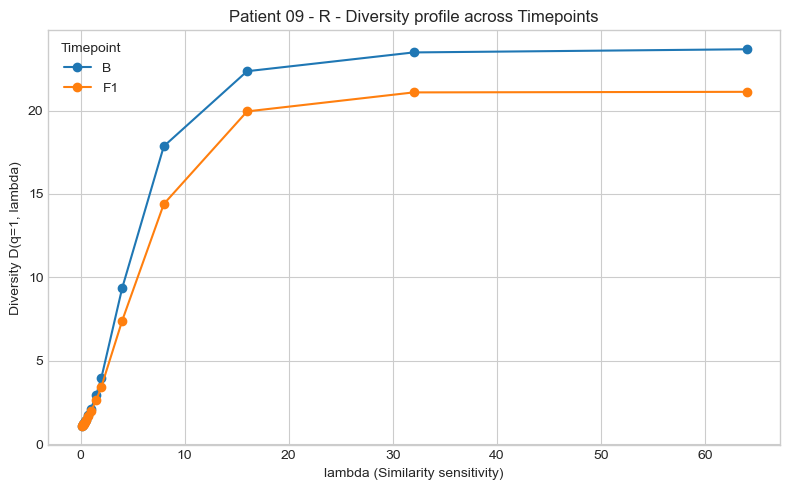

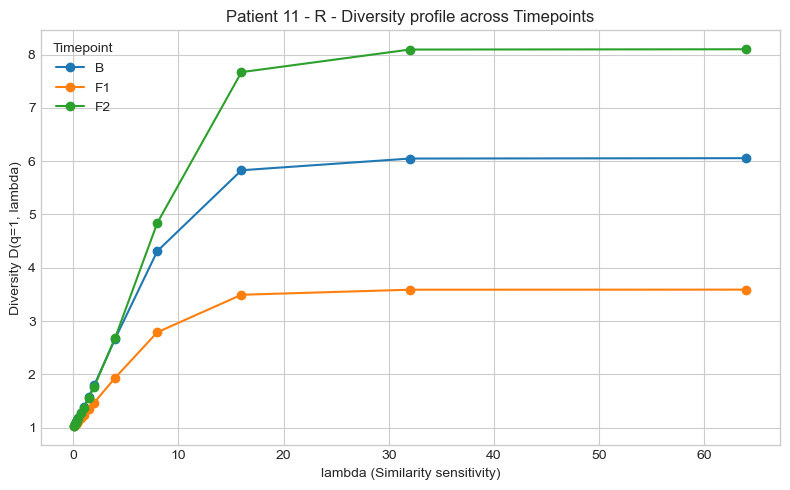

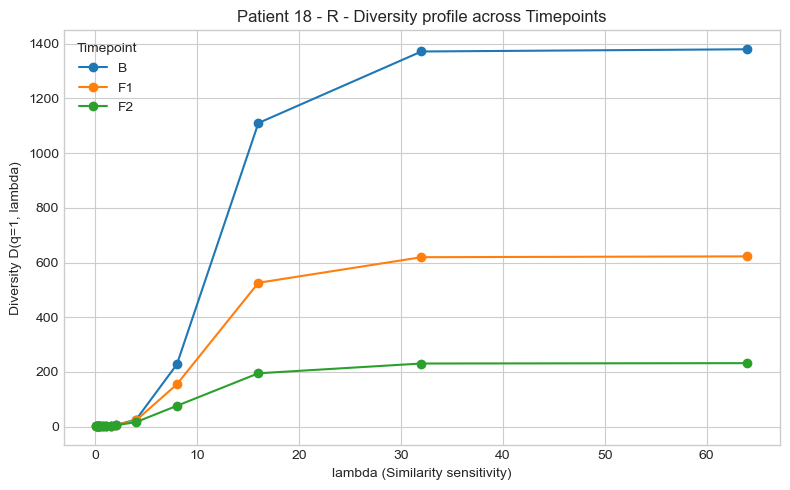

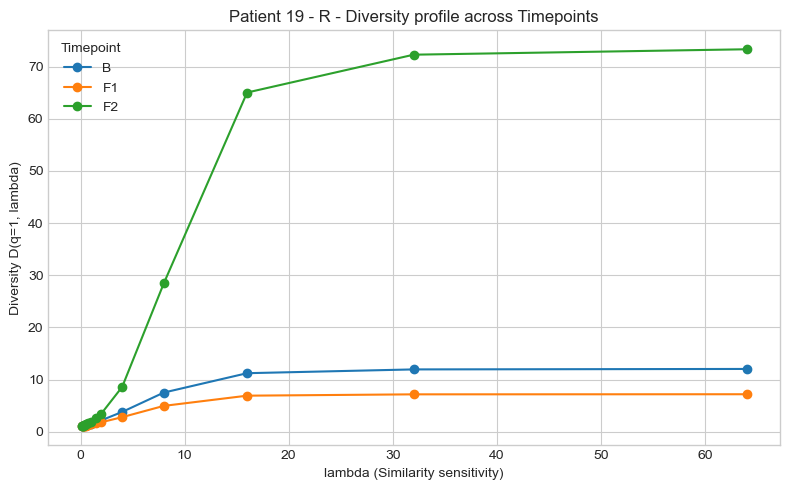

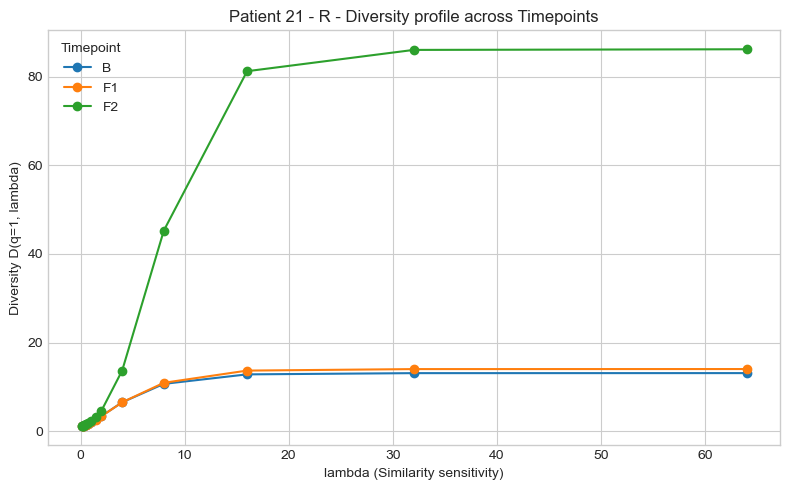

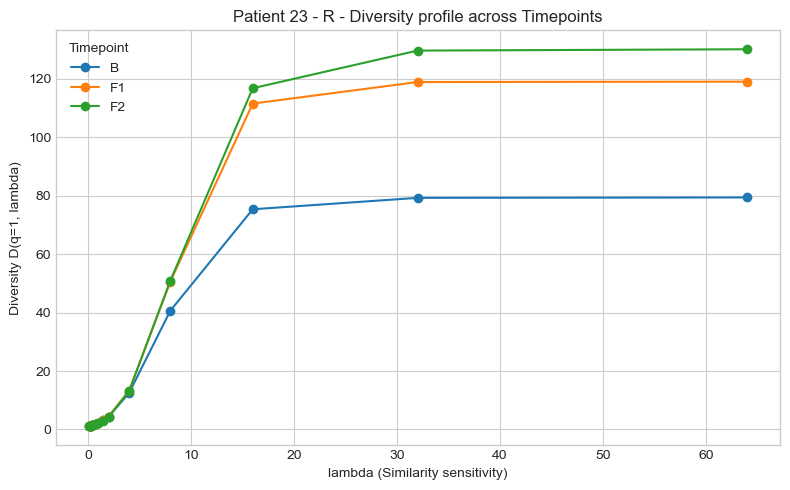

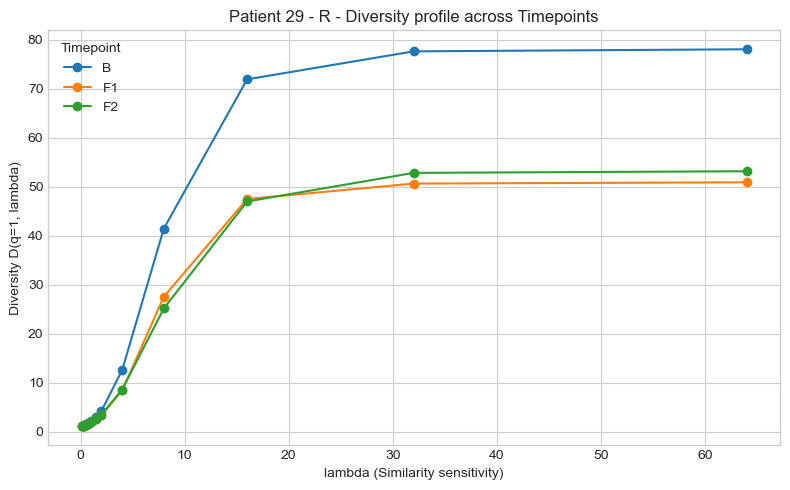

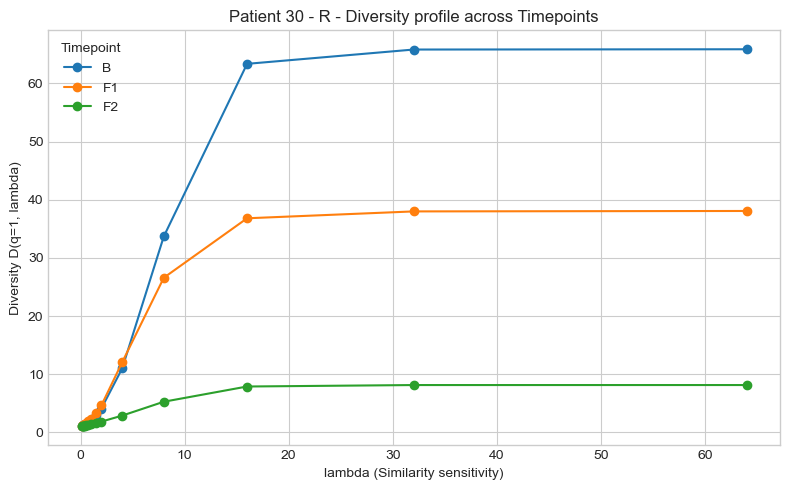

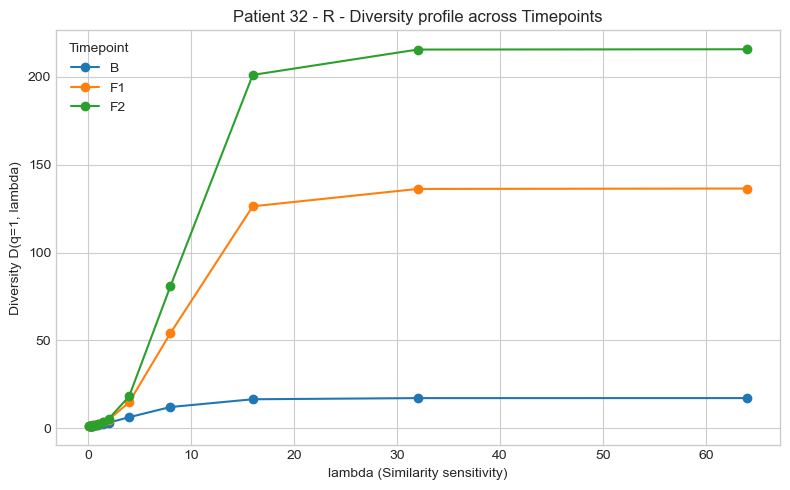

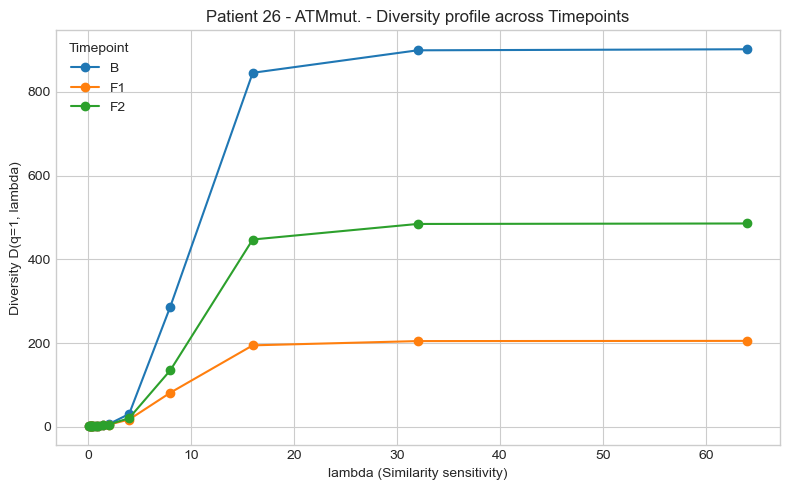

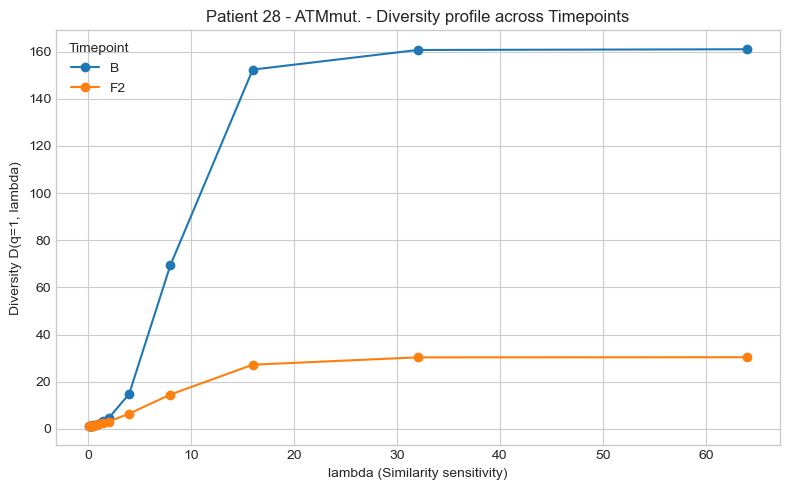

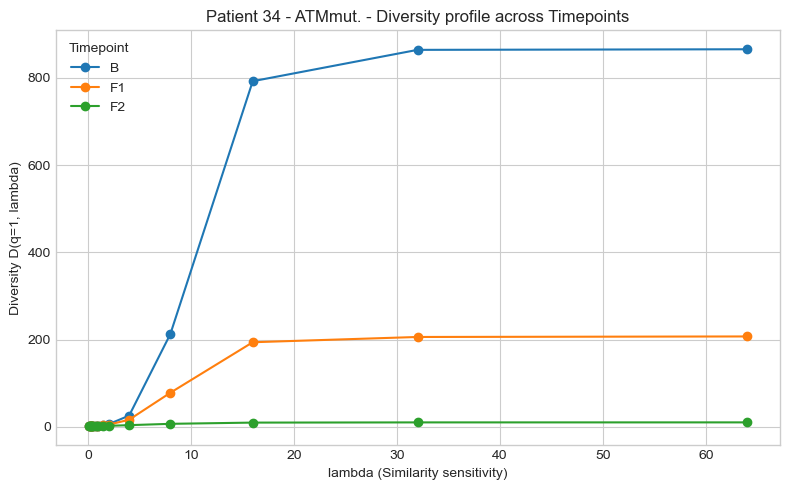

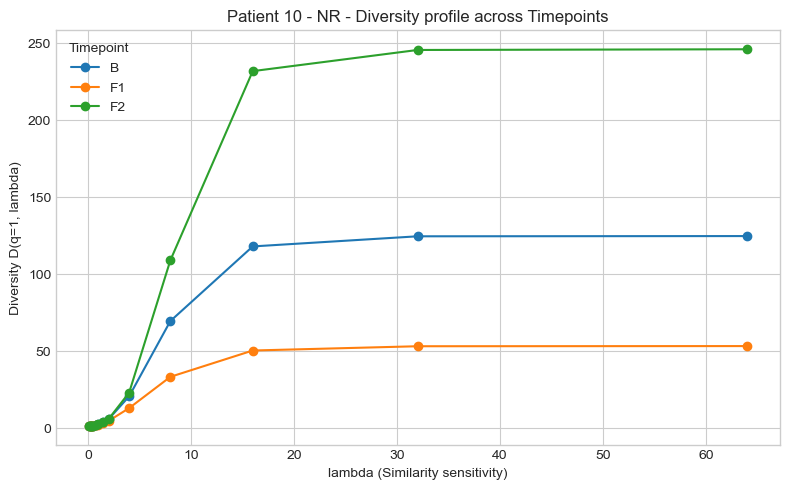

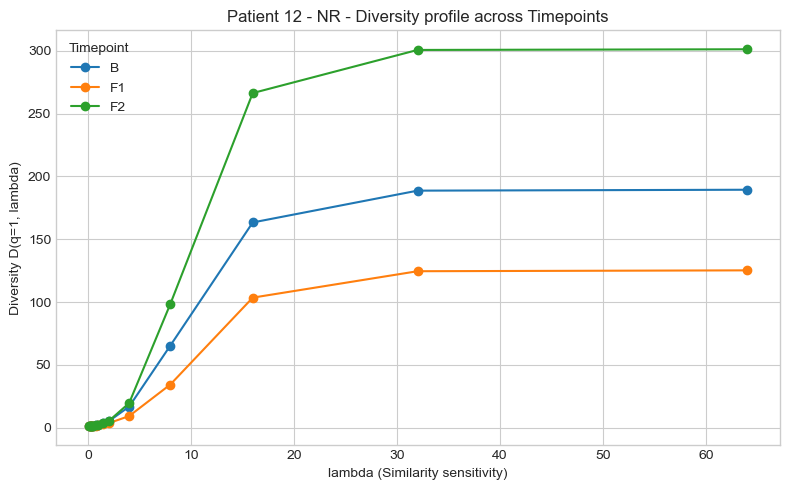

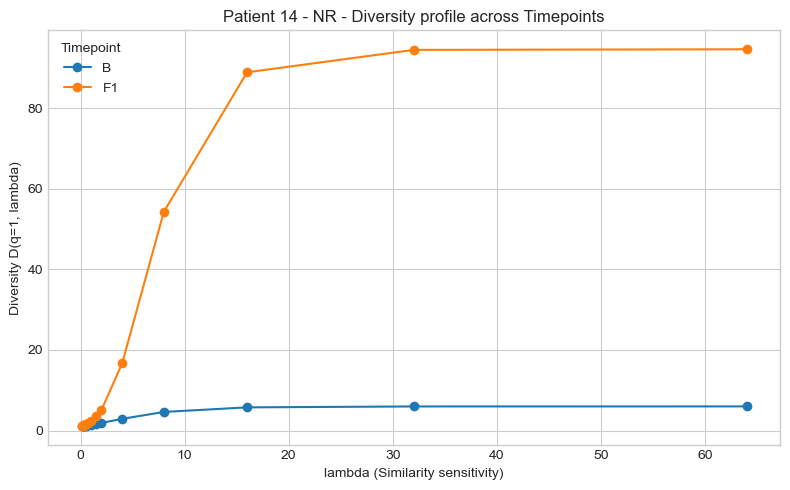

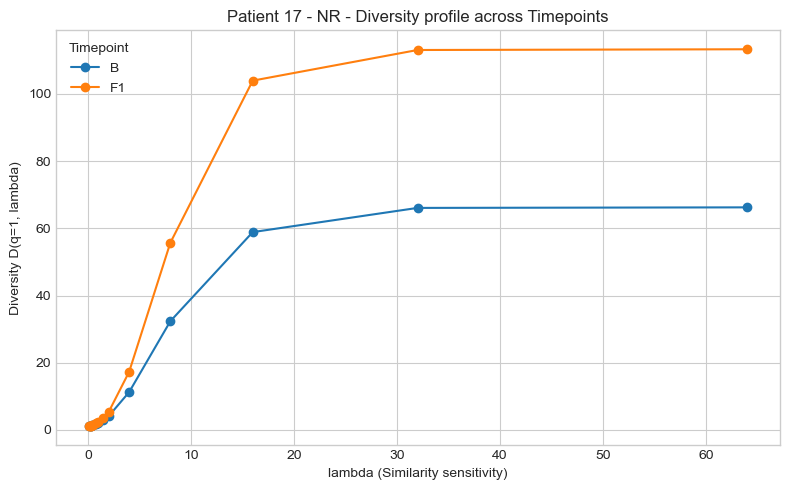

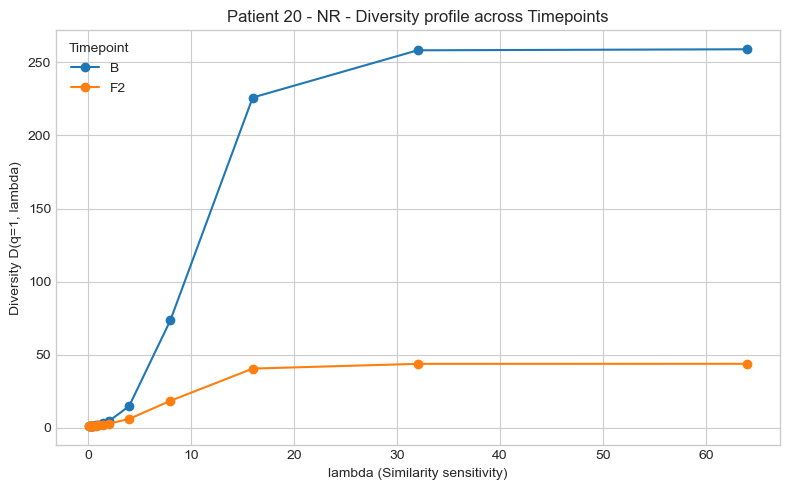

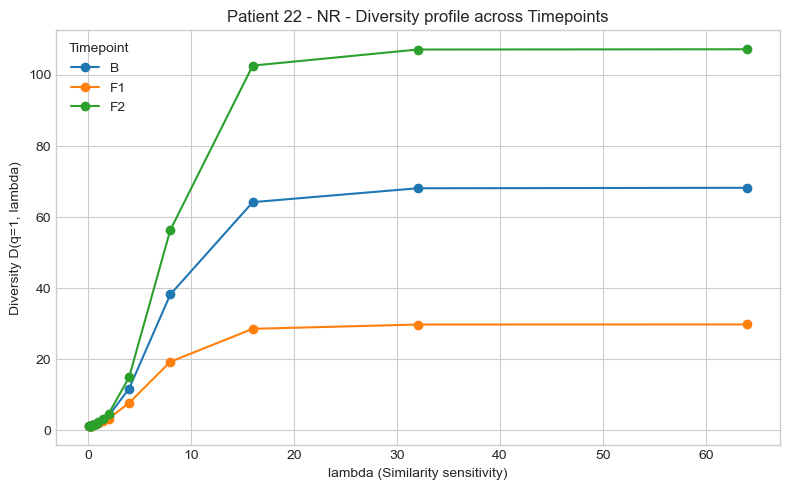

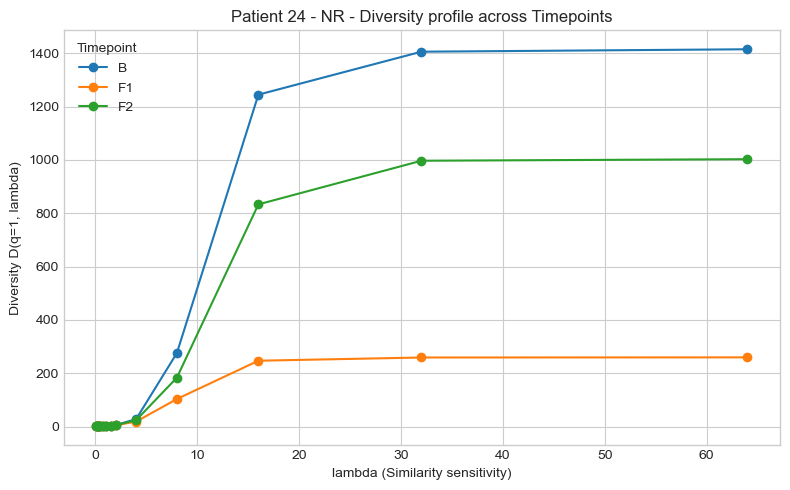

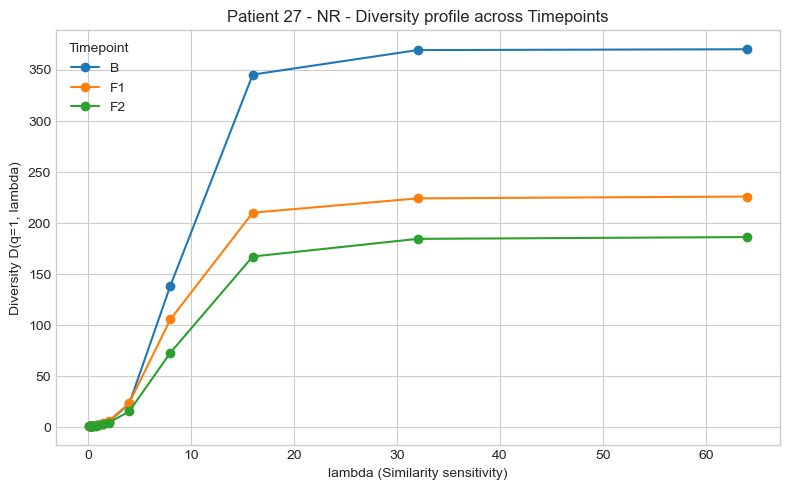

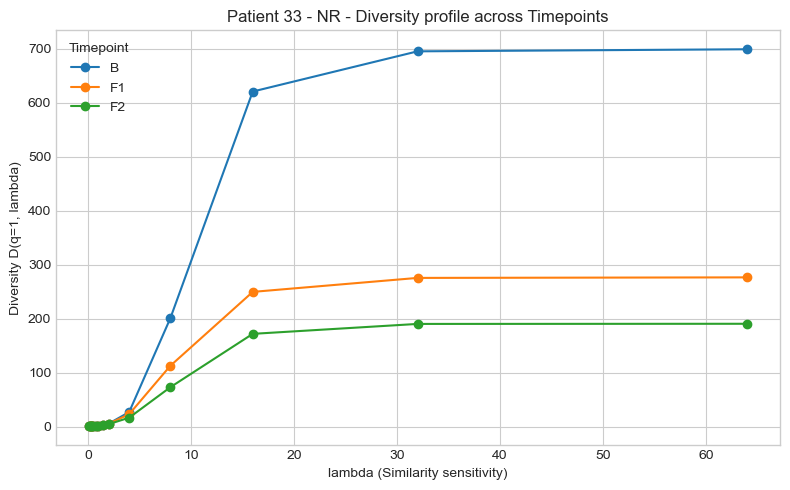

In [882]:
# 설정: q와 λ 값들
lambda_values = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.75, 1.0, 1.5, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0]
# 고정할 q 값
q_fixed = 1

# 실제 plot 수행
for patient_id in patient_samples.keys():
    sample_list = patient_samples[patient_id]
    
    # 타임포인트가 2개 이상이어야 의미 있음
    if len(sample_list) < 2:
        continue

    # B 있는지 확인
    if not any('B' in s for s in sample_list):
        continue

    # 시간순 정렬 (B, F1, F2 순서)
    time_sorted = []
    patient_num = patient_id.split(' - ')[0]  # Extract patient number without response status
    for label in ['B', 'F1', 'F2']:
        full_name = f"A{patient_num}{label}"
        if full_name in sample_list:
            time_sorted.append(full_name)
    
    # 타임포인트가 비어있으면 건너뛰기
    if not time_sorted:
        continue
        
    # 실제 plot
    plt.figure(figsize=(8, 5))
    for sample_id in time_sorted:
        # Extract timepoint label (B, F1, F2)
        label = sample_id[-2:] if sample_id[-2] == 'F' else 'B'
        if sample_id in diversity_profiles:
            df = diversity_profiles[sample_id]
            y_vals = df.loc[q_fixed][lambda_values].values
            plt.plot(lambda_values, y_vals, label=label, marker='o')
    
    # 스타일 설정
    plt.xlabel("lambda (Similarity sensitivity)")
    plt.ylabel(f"Diversity D(q={q_fixed}, lambda)")
    plt.title(f"Patient {patient_id} - Diversity profile across Timepoints")
    plt.legend(title="Timepoint")
    plt.grid(True)
    plt.xscale('linear')
    # plt.xscale('log')  # Better visualization with log scale for lambda
    plt.tight_layout()
    plt.show()

### Rating Heatmap

Show the rating of diversity by timepoints for each patient IDs.

In [883]:
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

#### Choose q and lambda

In [1237]:
# Set fixed q and lambda values (choose one of the following)
q_fixed = 1; lambda_fixed = 32  # Based on the plot above

# Shannon Diversity
# lambda_fixed = 0; q_fixed = 0 # Shannon Diversity

# Shannon Clonality
# lambda_fixed = 0; q_fixed = 1 # Shannon Clonality

#### For all samples

In [1238]:
# Prepare data for the heatmap
patients = []
response_groups = []
diversity_data = []

for patient_id in patient_samples.keys():
    sample_list = patient_samples[patient_id]
    
    # Need all three timepoints to include in visualization
    if not any('B' in s for s in sample_list):
        continue
        
    # Get patient number without response status
    patient_num = patient_id.split(' - ')[0]
    response_status = patient_id.split(' - ')[1] if ' - ' in patient_id else ''
    
    # Get diversity values for each timepoint
    timepoints_data = {'B': None, 'F1': None, 'F2': None}
    
    for label in ['B', 'F1', 'F2']:
        sample_name = f"A{patient_num}{label}"
        if sample_name in diversity_profiles:
            timepoints_data[label] = diversity_profiles[sample_name].loc[q_fixed, lambda_fixed]
    
    # If we have at least two timepoints with data, add to our visualization
    if sum(v is not None for v in timepoints_data.values()) >= 2:
        patients.append(patient_num)
        response_groups.append(response_status)
        diversity_data.append([timepoints_data['B'], timepoints_data['F1'], timepoints_data['F2']])

# Convert to numpy array for easier manipulation but convert None to NaN first
diversity_array = np.array([[np.nan if x is None else x for x in patient] for patient in diversity_data], dtype=float)

# Create a mask for missing values
mask = np.isnan(diversity_array)

# For each patient, determine the color based on the order (descending)
normalized_data = np.zeros_like(diversity_array)
for i in range(len(diversity_array)):
    valid_values = diversity_array[i][~np.isnan(diversity_array[i])]
    if len(valid_values) > 0:
        # Sort values in descending order and get ranks
        sorted_indices = np.argsort(-valid_values)
        ranks = np.zeros(len(valid_values))
        ranks[sorted_indices] = np.arange(len(valid_values))
        
        # Map ranks to original positions
        j = 0
        for k in range(len(diversity_array[i])):
            if not np.isnan(diversity_array[i][k]):
                normalized_data[i][k] = ranks[j]
                j += 1

# Transpose the data for 90-degree counter-clockwise rotation
normalized_data = normalized_data.T
mask = mask.T

print("Diversity data shape:", normalized_data.shape)
print(diversity_data[:2])

Diversity data shape: (3, 21)
[[np.float64(23.48465889000317), np.float64(21.08885349214777), None], [np.float64(6.048758230792779), np.float64(3.587382849378153), np.float64(8.094109305619257)]]


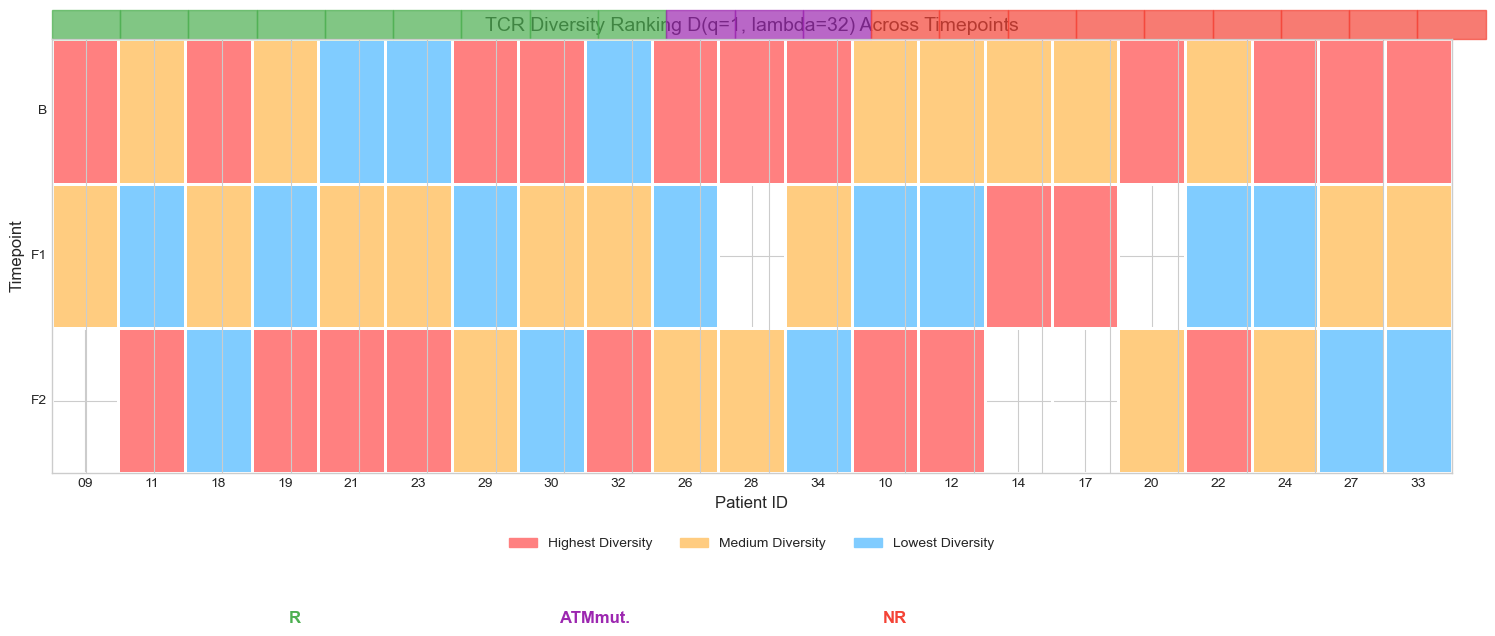

In [1239]:
# Create figure and axes
plt.figure(figsize=(15, 6))

# Define colors for different ranks
colors = ['#ff8080', '#ffcc80', '#80ccff']  # Red (highest), Orange (middle), Blue (lowest)
cmap = ListedColormap(colors)

# Plot heatmap
ax = sns.heatmap(normalized_data, 
                 mask=mask, 
                 cmap=cmap, 
                 cbar=False,
                 linewidths=1,
                 linecolor='white')

# After rotation: X-axis is patients, Y-axis is timepoints
plt.xticks(np.arange(len(patients)) + 0.5, patients)
plt.yticks([0.5, 1.5, 2.5], ['B', 'F1', 'F2'], rotation=0)
if q_fixed == 0 and lambda_fixed == 0:
    plt.title('TCR Diversity Ranking by Shannon Diversity Across Timepoints', fontsize=14)
elif q_fixed == 1 and lambda_fixed == 0:
    plt.title('TCR Diversity Ranking by Shannon Clonality Across Timepoints', fontsize=14)
else:
    plt.title(f'TCR Diversity Ranking D(q={q_fixed}, lambda={lambda_fixed}) Across Timepoints', fontsize=14)
plt.xlabel('Patient ID', fontsize=12)
plt.ylabel('Timepoint', fontsize=12)

# Add color legend
handles = [Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(3)]
labels = ['Highest Diversity', 'Medium Diversity', 'Lowest Diversity']
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3)

# Add response group indicators 
response_colors = {'R': '#4CAF50', 'NR': '#F44336', 'ATMmut.': '#9C27B0'}
unique_responses = ['R', 'ATMmut.', 'NR']

# Create a new axis for response group indicators
ax_response = ax.twiny()
ax_response.set_xticks(np.arange(len(patients)) + 0.5)
ax_response.set_xticklabels('')
ax_response.tick_params(axis='x', length=0)

# Add colored boxes for response groups
for i, resp in enumerate(response_groups):
    if resp in response_colors:
        ax_response.add_patch(Rectangle((i, -0.2), 1, 0.2, color=response_colors[resp], clip_on=False, alpha=0.7))

# Add response group labels
for i, resp in enumerate(unique_responses):
    plt.figtext(0.2 + i*0.2, -0.05, resp, color=response_colors[resp], ha='center', fontsize=12, weight='bold')

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

#### For intact T.P.s

In [1240]:
# Prepare data for the heatmap
patients_intact = []
response_groups_intact = []
diversity_data_intact = []

for patient_id in patient_samples.keys():
    sample_list = patient_samples[patient_id]
    
    # Need all three timepoints to include in visualization
    if not any('B' in s for s in sample_list):
        continue
        
    # Get patient number without response status
    patient_num = patient_id.split(' - ')[0]
    response_status = patient_id.split(' - ')[1] if ' - ' in patient_id else ''
    
    # Get diversity values for each timepoint
    timepoints_data = {'B': None, 'F1': None, 'F2': None}
    
    for label in ['B', 'F1', 'F2']:
        sample_name = f"A{patient_num}{label}"
        if sample_name in diversity_profiles:
            timepoints_data[label] = diversity_profiles[sample_name].loc[q_fixed, lambda_fixed]
    
    # If we have at least two timepoints with data, add to our visualization
    if sum(v is not None for v in timepoints_data.values()) >= 3:
        patients_intact.append(patient_num)
        response_groups_intact.append(response_status)
        diversity_data_intact.append([timepoints_data['B'], timepoints_data['F1'], timepoints_data['F2']])

# Convert to numpy array for easier manipulation but convert None to NaN first
diversity_array = np.array([[np.nan if x is None else x for x in patient] for patient in diversity_data_intact], dtype=float)

# Create a mask for missing values
mask = np.isnan(diversity_array)

# For each patient, determine the color based on the order (descending)
normalized_data = np.zeros_like(diversity_array)
for i in range(len(diversity_array)):
    valid_values = diversity_array[i][~np.isnan(diversity_array[i])]
    if len(valid_values) > 0:
        # Sort values in descending order and get ranks
        sorted_indices = np.argsort(-valid_values)
        ranks = np.zeros(len(valid_values))
        ranks[sorted_indices] = np.arange(len(valid_values))
        
        # Map ranks to original positions
        j = 0
        for k in range(len(diversity_array[i])):
            if not np.isnan(diversity_array[i][k]):
                normalized_data[i][k] = ranks[j]
                j += 1

# Transpose the data for 90-degree counter-clockwise rotation
normalized_data = normalized_data.T
mask = mask.T

print("Diversity data shape:", normalized_data.shape)
print(diversity_data_intact[:2])

Diversity data shape: (3, 16)
[[np.float64(6.048758230792779), np.float64(3.587382849378153), np.float64(8.094109305619257)], [np.float64(1371.7226997420073), np.float64(619.4928904153885), np.float64(230.77648752384076)]]


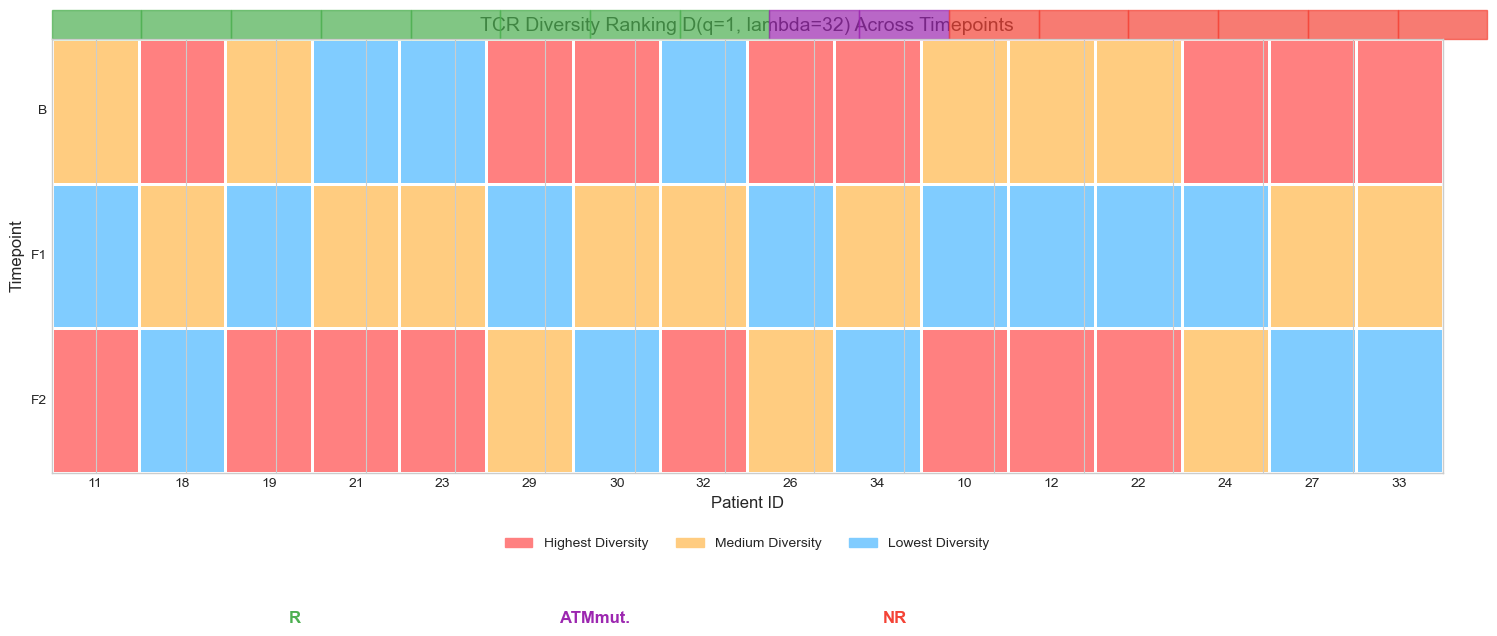

In [1241]:
# Create figure and axes
plt.figure(figsize=(15, 6))

# Define colors for different ranks
colors = ['#ff8080', '#ffcc80', '#80ccff']  # Red (highest), Orange (middle), Blue (lowest)
cmap = ListedColormap(colors)

# Plot heatmap
ax = sns.heatmap(normalized_data, 
                 mask=mask, 
                 cmap=cmap, 
                 cbar=False,
                 linewidths=1,
                 linecolor='white')

# After rotation: X-axis is patients_intact, Y-axis is timepoints
plt.xticks(np.arange(len(patients_intact)) + 0.5, patients_intact)
plt.yticks([0.5, 1.5, 2.5], ['B', 'F1', 'F2'], rotation=0)
plt.title(f'TCR Diversity Ranking D(q={q_fixed}, lambda={lambda_fixed}) Across Timepoints', fontsize=14)
plt.xlabel('Patient ID', fontsize=12)
plt.ylabel('Timepoint', fontsize=12)

# Add color legend
handles = [Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(3)]
labels = ['Highest Diversity', 'Medium Diversity', 'Lowest Diversity']
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3)

# Add response group indicators 
response_colors = {'R': '#4CAF50', 'NR': '#F44336', 'ATMmut.': '#9C27B0'}
unique_responses = ['R', 'ATMmut.', 'NR']

# Create a new axis for response group indicators
ax_response = ax.twiny()
ax_response.set_xticks(np.arange(len(patients_intact)) + 0.5)
ax_response.set_xticklabels('')
ax_response.tick_params(axis='x', length=0)

# Add colored boxes for response groups
for i, resp in enumerate(response_groups_intact):
    if resp in response_colors:
        ax_response.add_patch(Rectangle((i, -0.2), 1, 0.2, color=response_colors[resp], clip_on=False, alpha=0.7))

# Add response group labels
for i, resp in enumerate(unique_responses):
    plt.figtext(0.2 + i*0.2, -0.05, resp, color=response_colors[resp], ha='center', fontsize=12, weight='bold')

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

### Box + Vln

Box + Vln plot of
- Standardization
- Normalization
- Softmax

In [1242]:
# Put patient_samples.keys() to the rownames of the diversity_data
diversity_df = pd.DataFrame(diversity_data, columns=['B', 'F1', 'F2'])
diversity_df['patient'] = patients
diversity_df['response'] = response_groups
# Reorder columns if desired
diversity_df = diversity_df[['patient', 'response', 'B', 'F1', 'F2']]
print(diversity_df)

   patient response            B          F1          F2
0       09        R    23.484659   21.088853         NaN
1       11        R     6.048758    3.587383    8.094109
2       18        R  1371.722700  619.492890  230.776488
3       19        R    11.951322    7.170446   72.303544
4       21        R    13.083528   13.996542   86.054525
5       23        R    79.298085  118.950879  129.718218
6       29        R    77.636065   50.638803   52.822364
7       30        R    65.822919   37.991195    8.135299
8       32        R    17.141518  136.245746  215.596692
9       26  ATMmut.   899.226498  204.683127  484.453212
10      28  ATMmut.   160.670226         NaN   30.319726
11      34  ATMmut.   864.149637  205.895894   10.052896
12      10       NR   124.566093   53.125855  245.642431
13      12       NR   188.730086  124.573434  300.763516
14      14       NR     5.976741   94.539345         NaN
15      17       NR    66.071630  113.060134         NaN
16      20       NR   258.25063

In [1243]:
diversity_df = pd.DataFrame(diversity_data, columns=['B', 'F1', 'F2'])
diversity_df['patient'] = patients
diversity_df['response'] = response_groups
# Reorder columns if desired
diversity_df = diversity_df[['patient', 'response', 'B', 'F1', 'F2']]
print(diversity_df)

   patient response            B          F1          F2
0       09        R    23.484659   21.088853         NaN
1       11        R     6.048758    3.587383    8.094109
2       18        R  1371.722700  619.492890  230.776488
3       19        R    11.951322    7.170446   72.303544
4       21        R    13.083528   13.996542   86.054525
5       23        R    79.298085  118.950879  129.718218
6       29        R    77.636065   50.638803   52.822364
7       30        R    65.822919   37.991195    8.135299
8       32        R    17.141518  136.245746  215.596692
9       26  ATMmut.   899.226498  204.683127  484.453212
10      28  ATMmut.   160.670226         NaN   30.319726
11      34  ATMmut.   864.149637  205.895894   10.052896
12      10       NR   124.566093   53.125855  245.642431
13      12       NR   188.730086  124.573434  300.763516
14      14       NR     5.976741   94.539345         NaN
15      17       NR    66.071630  113.060134         NaN
16      20       NR   258.25063

In [1244]:
# Put patient_samples.keys() to the rownames of the diversity_data
diversity_df_intact = pd.DataFrame(diversity_data_intact, columns=['B', 'F1', 'F2'])
diversity_df_intact['patient'] = patients_intact
diversity_df_intact['response'] = response_groups_intact
# Reorder columns if desired
diversity_df_intact = diversity_df_intact[['patient', 'response', 'B', 'F1', 'F2']]
print(diversity_df_intact)

   patient response            B          F1          F2
0       11        R     6.048758    3.587383    8.094109
1       18        R  1371.722700  619.492890  230.776488
2       19        R    11.951322    7.170446   72.303544
3       21        R    13.083528   13.996542   86.054525
4       23        R    79.298085  118.950879  129.718218
5       29        R    77.636065   50.638803   52.822364
6       30        R    65.822919   37.991195    8.135299
7       32        R    17.141518  136.245746  215.596692
8       26  ATMmut.   899.226498  204.683127  484.453212
9       34  ATMmut.   864.149637  205.895894   10.052896
10      10       NR   124.566093   53.125855  245.642431
11      12       NR   188.730086  124.573434  300.763516
12      22       NR    68.101346   29.729219  107.165970
13      24       NR  1405.770192  259.164098  996.917419
14      27       NR   369.484590  224.274977  184.648095
15      33       NR   695.345719  275.870316  190.676383


#### Softmax

In [1245]:
diversity_df_intact_softmax = []
# Calculate softmax diversity for each patient
for patient_data in diversity_df_intact[['B', 'F1', 'F2']].values:
    # Calculate total diversity, ignoring NaN values
    total_diversity = np.nansum(patient_data)
    
    # Calculate diversity: value / total_diversity
    softmax_data = patient_data / total_diversity if total_diversity > 0 else patient_data  # Avoid division by zero
    diversity_df_intact_softmax.append(softmax_data)

# Check if the softmax calculation worked
diversity_df_intact_softmax = pd.DataFrame(
    diversity_df_intact_softmax,
    columns=['B', 'F1', 'F2']
)
# Insert 'patient' and 'response' columns at the front
diversity_df_intact_softmax.insert(0, 'response', diversity_df_intact['response'].values)
diversity_df_intact_softmax.insert(0, 'patient', diversity_df_intact['patient'].values)
print(diversity_df_intact_softmax)

   patient response         B        F1        F2
0       11        R  0.341155  0.202331  0.456514
1       18        R  0.617339  0.278801  0.103860
2       19        R  0.130722  0.078430  0.790848
3       21        R  0.115646  0.123716  0.760638
4       23        R  0.241787  0.362691  0.395522
5       29        R  0.428698  0.279622  0.291680
6       30        R  0.587970  0.339360  0.072669
7       32        R  0.046456  0.369246  0.584298
8       26  ATMmut.  0.566134  0.128864  0.305002
9       34  ATMmut.  0.800066  0.190627  0.009307
10      10       NR  0.294250  0.125494  0.580256
11      12       NR  0.307344  0.202866  0.489789
12      22       NR  0.332207  0.145023  0.522770
13      24       NR  0.528117  0.097362  0.374520
14      27       NR  0.474667  0.288120  0.237213
15      33       NR  0.598460  0.237432  0.164108


In [1246]:
from scipy.stats import normaltest, levene, ttest_ind, mannwhitneyu

# Initialize a dictionary to store results
stat_results_in_tps = {}

for tp in ['B', 'F1', 'F2']:
    group_r = diversity_df_intact_softmax.loc[diversity_df_intact_softmax['response'] == 'R', tp].dropna()
    group_nr = diversity_df_intact_softmax.loc[diversity_df_intact_softmax['response'].isin(['ATMmut.', 'NR']), tp].dropna()

    # Normality test (H0: data is normal)
    stat_r, p_r = normaltest(group_r)
    stat_nr, p_nr = normaltest(group_nr)

    # Equal variance test (H0: variances are equal)
    stat_var, p_var = levene(group_r, group_nr)

    # Use Mann-Whitney U test if either group is small
    if len(group_r) < 20 or len(group_nr) < 20:
        stat, p = mannwhitneyu(group_r, group_nr, alternative='two-sided')
        test_used = "Mann-Whitney U"
    else:
        # If both groups are normal and variances are equal, use t-test
        if p_r > 0.05 and p_nr > 0.05 and p_var > 0.05:
            stat, p = ttest_ind(group_r, group_nr, equal_var=True, alternative='two-sided')
            test_used = "t-test"
        elif p_r > 0.05 and p_nr > 0.05:
            stat, p = ttest_ind(group_r, group_nr, equal_var=False, alternative='two-sided')
            test_used = "Welch's t-test"
        else:
            stat, p = mannwhitneyu(group_r, group_nr, alternative='two-sided')
            test_used = "Mann-Whitney U"

    # Store results with timepoint label
    stat_results_in_tps[f'test_used_{tp}'] = test_used
    stat_results_in_tps[f'p_r_{tp}'] = p_r
    stat_results_in_tps[f'p_nr_{tp}'] = p_nr
    stat_results_in_tps[f'p_var_{tp}'] = p_var
    stat_results_in_tps[f'p_{tp}'] = p

    print(f"\nTimepoint: {tp}")
    print(f"Normality p-value (R): {p_r:.4f}")
    print(f"Normality p-value (ATMmut. & NR): {p_nr:.4f}")
    print(f"Equal variance p-value: {p_var:.4f}")
    print(f"{test_used} p-value: {p:.4f}")


Timepoint: B
Normality p-value (R): 0.4811
Normality p-value (ATMmut. & NR): 0.7482
Equal variance p-value: 0.3910
Mann-Whitney U p-value: 0.1949

Timepoint: F1
Normality p-value (R): 0.5520
Normality p-value (ATMmut. & NR): 0.7090
Equal variance p-value: 0.2758
Mann-Whitney U p-value: 0.2345

Timepoint: F2
Normality p-value (R): 0.6474
Normality p-value (ATMmut. & NR): 0.7997
Equal variance p-value: 0.3536
Mann-Whitney U p-value: 0.5054


In [1247]:
# Initialize a dictionary to store results for comparison between 3 timepoints in R group
stat_results_in_r = {}
stat_results_in_nr = {}

group_r_b = diversity_df_intact_softmax.loc[diversity_df_intact_softmax['response'] == 'R', 'B']
group_r_f1 = diversity_df_intact_softmax.loc[diversity_df_intact_softmax['response'] == 'R', 'F1']
group_r_f2 = diversity_df_intact_softmax.loc[diversity_df_intact_softmax['response'] == 'R', 'F2']
group_nr_b = diversity_df_intact_softmax.loc[diversity_df_intact_softmax['response'].isin(['ATMmut.', 'NR']), 'B']
group_nr_f1 = diversity_df_intact_softmax.loc[diversity_df_intact_softmax['response'].isin(['ATMmut.', 'NR']), 'F1']
group_nr_f2 = diversity_df_intact_softmax.loc[diversity_df_intact_softmax['response'].isin(['ATMmut.', 'NR']), 'F2']

# Normality test (H0: data is normal)
stat_r_b, p_r_b = normaltest(group_r_b)
stat_r_f1, p_r_f1 = normaltest(group_r_f1)
stat_r_f2, p_r_f2 = normaltest(group_r_f2)
stat_nr_b, p_nr_b = normaltest(group_nr_b)
stat_nr_f1, p_nr_f1 = normaltest(group_nr_f1)
stat_nr_f2, p_nr_f2 = normaltest(group_nr_f2)

# Equal variance test (H0: variances are equal)
stat_var_b_vs_f1_r, p_var_b_vs_f1_r = levene(group_r_b, group_r_f1)
stat_var_b_vs_f2_r, p_var_b_vs_f2_r = levene(group_r_b, group_r_f2)
stat_var_f1_vs_f2_r, p_var_f1_vs_f2_r = levene(group_r_f1, group_r_f2)
stat_var_b_vs_f1_nr, p_var_b_vs_f1_nr = levene(group_nr_b, group_nr_f1)
stat_var_b_vs_f2_nr, p_var_b_vs_f2_nr = levene(group_nr_b, group_nr_f2)
stat_var_f1_vs_f2_nr, p_var_f1_vs_f2_nr = levene(group_nr_f1, group_nr_f2)

In [1248]:
# Create a dataframe to store the normality and variance test results
normality_and_variance_results_r = pd.DataFrame({
    'Responder Group': ['B', 'F1', 'F2'],
    'Normality p-value': [p_r_b, p_r_f1, p_r_f2],
    'Variance p-value (B vs F1)': [p_var_b_vs_f1_r, p_var_b_vs_f1_r, np.nan],
    'Variance p-value (B vs F2)': [p_var_b_vs_f2_r, p_var_b_vs_f2_r, np.nan],
    'Variance p-value (F1 vs F2)': [p_var_f1_vs_f2_r, p_var_f1_vs_f2_r, p_var_f1_vs_f2_r]
})
print(normality_and_variance_results_r)

  Responder Group  Normality p-value  Variance p-value (B vs F1)  \
0               B           0.481058                     0.04565   
1              F1           0.552037                     0.04565   
2              F2           0.647418                         NaN   

   Variance p-value (B vs F2)  Variance p-value (F1 vs F2)  
0                    0.575191                     0.034057  
1                    0.575191                     0.034057  
2                         NaN                     0.034057  


In [1249]:
# Create a dataframe to store the normality and variance test results
normality_and_variance_results_nr = pd.DataFrame({
    'Responder Group': ['B', 'F1', 'F2'],
    'Normality p-value': [p_nr_b, p_nr_f1, p_nr_f2],
    'Variance p-value (B vs F1)': [p_var_b_vs_f1_nr, p_var_b_vs_f1_nr, np.nan],
    'Variance p-value (B vs F2)': [p_var_b_vs_f2_nr, p_var_b_vs_f2_nr, np.nan],
    'Variance p-value (F1 vs F2)': [p_var_f1_vs_f2_nr, p_var_f1_vs_f2_nr, p_var_f1_vs_f2_nr]
})
print(normality_and_variance_results_nr)

  Responder Group  Normality p-value  Variance p-value (B vs F1)  \
0               B           0.748246                    0.039096   
1              F1           0.708994                    0.039096   
2              F2           0.799734                         NaN   

   Variance p-value (B vs F2)  Variance p-value (F1 vs F2)  
0                    0.679175                     0.015093  
1                    0.679175                     0.015093  
2                         NaN                     0.015093  


In [1250]:
# Create a dataframe to store the results of the p-values for each comparison
comparison_results_in_r = pd.DataFrame(columns=['Comparison', 'Test Used', 'p-value'])

for comparison, group1, group2, p_var in [
    ('B vs F1', group_r_b, group_r_f1, p_var_b_vs_f1_r),
    ('B vs F2', group_r_b, group_r_f2, p_var_b_vs_f2_r),
    ('F1 vs F2', group_r_f1, group_r_f2, p_var_f1_vs_f2_r)
]:
    # Use Mann-Whitney U test if either group is small
    if len(group1) < 20 or len(group2) < 20:
        stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
        test_used = "Mann-Whitney U test"
    else:
        # If both groups are normal and variances are equal, use t-test
        if normaltest(group1)[1] > 0.05 and normaltest(group2)[1] and levene(group1, group2)[1] > 0.05:
            stat, p = ttest_ind(group1, group2, equal_var=True, alternative='two-sided')
            test_used = "t-test"
        elif normaltest(group1)[1] > 0.05 and normaltest(group2)[1] > 0.05:
            stat, p = ttest_ind(group1, group2, equal_var=False, alternative='two-sided')
            test_used = "Welch's t-test"
        else:
            stat, p = mannwhitneyu(group1, group2, equal_var=False, alternative='two-sided')
            test_used = "Mann-Whitney U test"
    
    # Create a new row and concatenate it with the existing dataframe
    new_row = pd.DataFrame({
        'Comparison': [comparison],
        'Test Used': [test_used],
        'p-value': [p]
    })
    comparison_results_in_r = pd.concat([comparison_results_in_r, new_row], ignore_index=True)

# Print the comparison results
print(comparison_results_in_r)


  Comparison            Test Used   p-value
0    B vs F1  Mann-Whitney U test  0.720901
1    B vs F2  Mann-Whitney U test  0.505361
2   F1 vs F2  Mann-Whitney U test  0.160528


C:\Users\iipms\AppData\Local\Temp\ipykernel_9004\3550612313.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison_results_in_r = pd.concat([comparison_results_in_r, new_row], ignore_index=True)


In [1251]:
# Create a dataframe to store the results of the p-values for each comparison
comparison_results_in_nr = pd.DataFrame(columns=['Comparison', 'Test Used', 'p-value'])

for comparison, group1, group2, p_var in [
    ('B vs F1', group_nr_b, group_nr_f1, p_var_b_vs_f1_nr),
    ('B vs F2', group_nr_b, group_nr_f2, p_var_b_vs_f2_nr),
    ('F1 vs F2', group_nr_f1, group_nr_f2, p_var_f1_vs_f2_nr)
]:
    # Use Mann-Whitney U test if either group is small
    if len(group1) < 20 or len(group2) < 20:
        stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
        test_used = "Mann-Whitney U test"
    else:
        # If both groups are normal and variances are equal, use t-test
        if normaltest(group1)[1] > 0.05 and normaltest(group2)[1] and levene(group1, group2)[1] > 0.05:
            stat, p = ttest_ind(group1, group2, equal_var=True, alternative='two-sided')
            test_used = "t-test"
        elif normaltest(group1)[1] > 0.05 and normaltest(group2)[1] > 0.05:
            stat, p = ttest_ind(group1, group2, equal_var=False, alternative='two-sided')
            test_used = "Welch's t-test"
        else:
            stat, p = mannwhitneyu(group1, group2, equal_var=False, alternative='two-sided')
            test_used = "Mann-Whitney U test"
    
    # Create a new row and concatenate it with the existing dataframe
    new_row = pd.DataFrame({
        'Comparison': [comparison],
        'Test Used': [test_used],
        'p-value': [p]
    })
    comparison_results_in_nr = pd.concat([comparison_results_in_nr, new_row], ignore_index=True)

# Print the comparison results
print(comparison_results_in_nr)

  Comparison            Test Used   p-value
0    B vs F1  Mann-Whitney U test  0.000155
1    B vs F2  Mann-Whitney U test  0.160528
2   F1 vs F2  Mann-Whitney U test  0.064957


C:\Users\iipms\AppData\Local\Temp\ipykernel_9004\538084792.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison_results_in_nr = pd.concat([comparison_results_in_nr, new_row], ignore_index=True)


In [1252]:
# Get the test method used in a safer way
comparison_results_in_r[comparison_results_in_r['Comparison'] == 'B vs F2']['Test Used'].values[0]

'Mann-Whitney U test'

In [1253]:
# Get the test method used in a safer way
comparison_results_in_nr[comparison_results_in_nr['Comparison'] == 'B vs F2']['Test Used'].values[0]

'Mann-Whitney U test'

##### R vs NR(or Reverse)

In [1254]:
# Height Parameters
HEIGHT_P_VAL_B_F1_R = 0.92
HEIGHT_P_VAL_B_F2_R = 1.002
HEIGHT_P_VAL_F1_F2_R = 0.945
HEIGHT_P_VAL_B_F1_NR = 1.01
HEIGHT_P_VAL_B_F2_NR = 1.002
HEIGHT_P_VAL_F1_F2_NR = 0.945

In [1255]:
diversity_df_intact_softmax.head()

,patient,response,B,F1,F2
0,11,R,0.341155,0.202331,0.456514
1,18,R,0.617339,0.278801,0.103860
2,19,R,0.130722,0.078430,0.790848
3,21,R,0.115646,0.123716,0.760638
4,23,R,0.241787,0.362691,0.395522


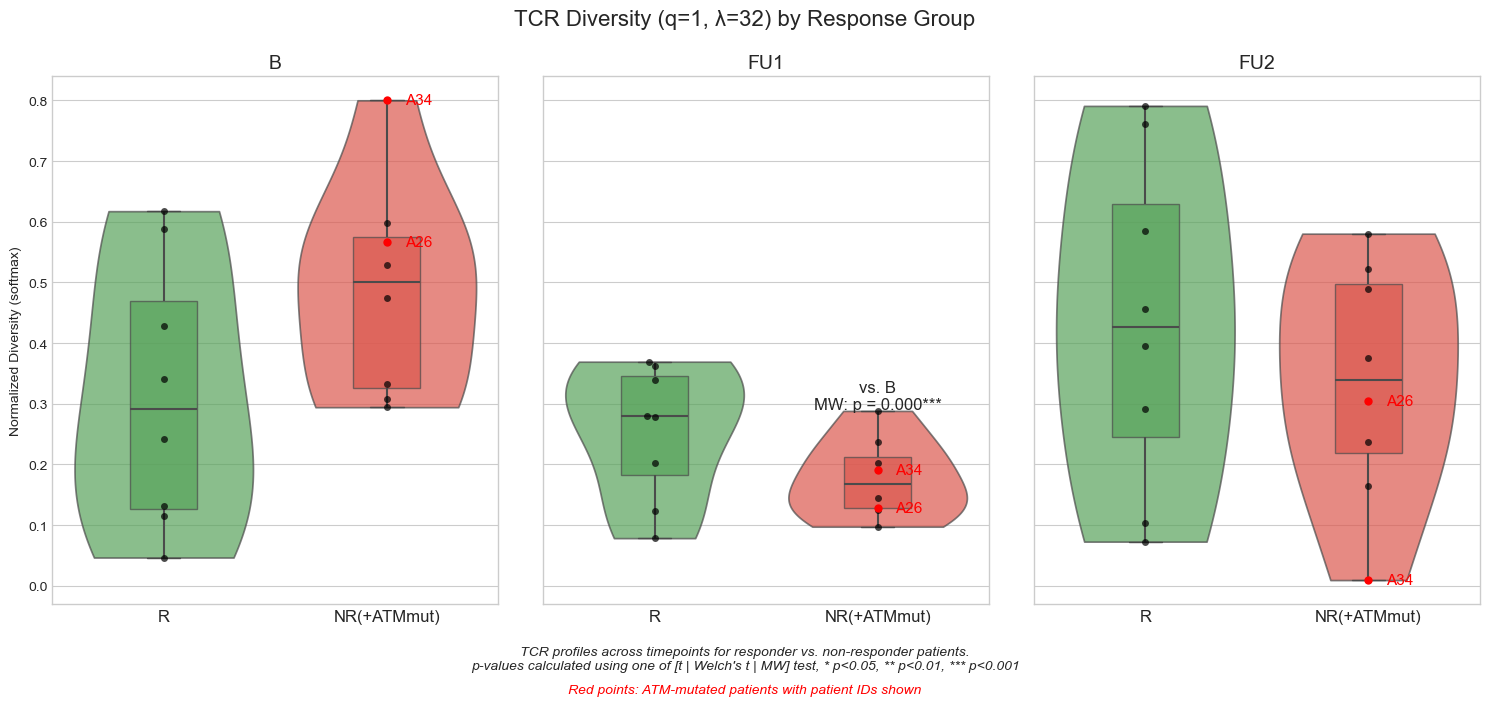

In [1256]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Arial'

# Melt dataframe
melted_df = pd.melt(
    diversity_df_intact_softmax,
    id_vars=['patient', 'response'],
    value_vars=['B', 'F1', 'F2'],
    var_name='timepoint',
    value_name='diversity'
)
melted_df['response_group'] = melted_df['response'].apply(lambda x: 'R' if x == 'R' else 'ATMmut./NR')
melted_df['is_atm_mut'] = melted_df['response'] == 'ATMmut.'  # Flag for ATMmut patients
melted_df['response_group'].value_counts()

# Plot setup
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
timepoints = ['B', 'F1', 'F2']
titles = ['B', 'FU1', 'FU2']
palette = {'R': '#4CAF50', 'ATMmut./NR': '#F44336'}
ORDER = ['R', 'ATMmut./NR']  # Ensure R is first for consistent ordering

# Plot each timepoint
for i, timepoint in enumerate(timepoints):
    tp_data = melted_df[melted_df['timepoint'] == timepoint]
    
    # violin + box
    sns.violinplot(data=tp_data, x='response_group', y='diversity',
                   hue='response_group', palette=palette, legend=False,
                   alpha=0.7, cut=0, inner=None, ax=axes[i], order=ORDER)
    sns.boxplot(data=tp_data, x='response_group', y='diversity',
                hue='response_group', palette=palette, legend=False,
                width=0.3, boxprops={'alpha': 0.7},
                whiskerprops={'linewidth': 1.5}, medianprops={'linewidth': 1.5},
                ax=axes[i], order=ORDER)
    
    # First plot non-ATMmut points in black
    non_atm = tp_data[~tp_data['is_atm_mut']]
    sns.swarmplot(data=non_atm, x='response_group', y='diversity',
                  color='black', size=5, alpha=0.7, ax=axes[i], order=ORDER)
    
    # Then plot ATMmut points in red and add labels
    atm_mut = tp_data[tp_data['is_atm_mut']]
    if not atm_mut.empty:
        sns.swarmplot(data=atm_mut, x='response_group', y='diversity',
                      color='red', size=6, alpha=1.0, ax=axes[i], order=ORDER)
        
        # Add patient ID labels next to these points
        for _, row in atm_mut.iterrows():
            x_pos = ORDER.index(row['response_group'])
            axes[i].text(x_pos + 0.08, row['diversity'], 
                         f"A{row['patient']}", 
                         color='red', fontsize=11, ha='left', va='center')

    # labels
    axes[i].set_title(titles[i], fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Normalized Diversity (softmax)' if i == 0 else '')

    # Fix x-tick labels based on ORDER
    label_dict = {'R': 'R', 'ATMmut./NR': 'NR(+ATMmut)'}
    axes[i].set_xticks(range(len(ORDER)))
    axes[i].set_xticklabels([label_dict[group] for group in ORDER], fontsize=12)


    # R vs NR p-value
    stat_key = 'test_used_' + timepoint
    if stat_key in stat_results_in_tps:
        test_type = stat_results_in_tps[stat_key]
        p_value = stat_results_in_tps['p_' + timepoint]

        if p_value < 0.05:
            method = {'t-test': 't', "Welch's t-test": 'Wt'}.get(test_type, 'MW')
            p_text = f"{method}: p = {p_value:.3f}*"
            if p_value < 0.01: p_text += "*"
            if p_value < 0.001: p_text += "*"

            group_data = tp_data[tp_data['response_group'] == 'R']
            y_max = group_data['diversity'].max()
            axes[i].text(ORDER.index('R'), y_max * HEIGHT_P_VAL_B_F1_R, p_text, ha='center', fontsize=12)

    # intra-group comparisons at F1 and F2
    if timepoint in ['F1', 'F2']:
        for grp, comp_df, height_dict in [('R', comparison_results_in_r, {
                                                'B vs F1': HEIGHT_P_VAL_B_F1_R,
                                                'B vs F2': HEIGHT_P_VAL_B_F2_R,
                                                'F1 vs F2': HEIGHT_P_VAL_F1_F2_R}),
                                          ('ATMmut./NR', comparison_results_in_nr, {
                                                'B vs F1': HEIGHT_P_VAL_B_F1_NR,
                                                'B vs F2': HEIGHT_P_VAL_B_F2_NR,
                                                'F1 vs F2': HEIGHT_P_VAL_F1_F2_NR})]:

            for comp in ['B vs F1', 'B vs F2', 'F1 vs F2']:
                if timepoint not in comp: continue
                row = comp_df[comp_df['Comparison'] == comp]
                if row.empty or row['p-value'].values[0] >= 0.05: continue

                test = row['Test Used'].values[0]
                pval = row['p-value'].values[0]
                test_text = "t" if test == "t-test" else "Wt" if test == "Welch's t-test" else "MW"
                label_text = f"vs. {'B' if 'B' in comp else 'F1'}\n{test_text}: p = {pval:.3f}*"
                if pval < 0.01: label_text += "*"
                if pval < 0.001: label_text += "*"

                group_data = melted_df[(melted_df['response_group'] == grp) &
                                       (melted_df['timepoint'] == timepoint)]
                y_max = group_data['diversity'].max()
                axes[i].text(ORDER.index(grp), y_max * height_dict[comp], label_text,
                             ha='center', fontsize=12)

# Final touches
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)

if q_fixed == 0 and lambda_fixed == 0:
    plt.suptitle('TCR Diversity (Shannon Diversity) by Response Group', fontsize=16, y=1.05)
elif q_fixed == 1 and lambda_fixed == 0:
    plt.suptitle('TCR Shannon Clonality by Response Group', fontsize=16, y=1.05)
else:
    plt.suptitle(f'TCR Diversity (q={q_fixed}, λ={lambda_fixed}) by Response Group', fontsize=16, y=1.05)

plt.figtext(0.5, -0.05,
           f'TCR profiles across timepoints for responder vs. non-responder patients.\n'
           f"p-values calculated using one of [t | Welch's t | MW] test, * p<0.05, ** p<0.01, *** p<0.001",
           ha='center', fontsize=10, style='italic')

# Add a legend for ATM mutant patients
plt.figtext(0.5, -0.09, 
            "Red points: ATM-mutated patients with patient IDs shown",
            ha='center', fontsize=10, color='red', style='italic')

plt.show()

##### B vs F1 vs F2

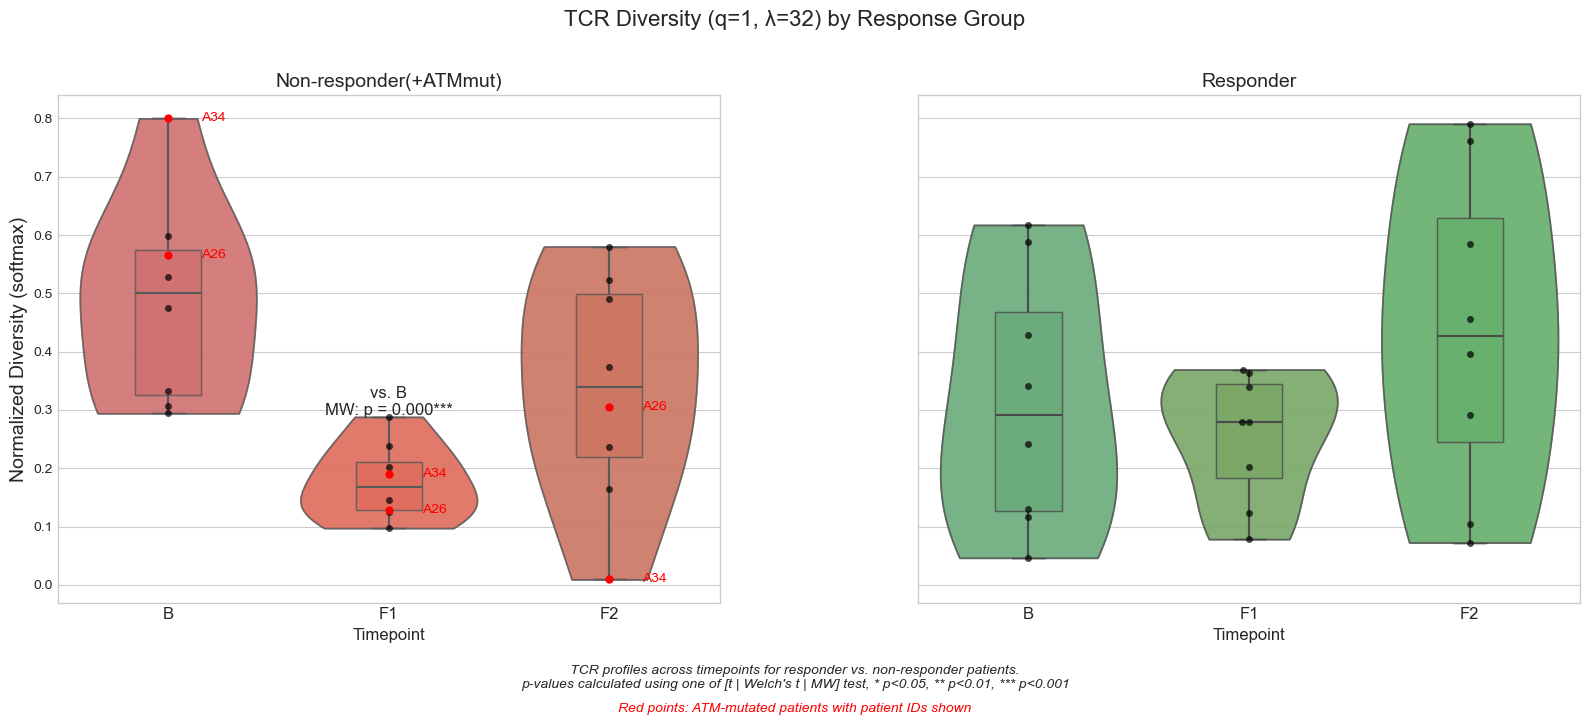

In [1257]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Arial'

# Melt dataframe
melted_df = pd.melt(diversity_df_intact_softmax, 
                    id_vars=['patient', 'response'],
                    value_vars=['B', 'F1', 'F2'],
                    var_name='timepoint',
                    value_name='diversity')
melted_df['response_group'] = melted_df['response'].apply(lambda x: 'R' if x == 'R' else 'ATMmut./NR')
# Add a flag for ATM mutant patients
melted_df['is_atm_mut'] = melted_df['response'] == 'ATMmut.'

# Palette
palette = {'R': '#4CAF50', 'ATMmut./NR': '#F44336'}

# Group plotting order
ORDER = ['ATMmut./NR', 'R']
timepoints = ['B', 'F1', 'F2']
titles = ['Non-responder(+ATMmut)', 'Responder']

# Subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for idx, group in enumerate(ORDER):
    group_data = melted_df[melted_df['response_group'] == group]
    ax = axes[idx]

    sns.violinplot(data=group_data, x='timepoint', y='diversity',
                   hue='timepoint', palette='pastel', legend=False,
                   alpha=0.7, cut=0, inner=None, ax=ax)

    sns.boxplot(data=group_data, x='timepoint', y='diversity',
                hue='timepoint', palette='pastel', legend=False,
                width=0.3, boxprops={'alpha': 0.7},
                whiskerprops={'linewidth': 1.5}, medianprops={'linewidth': 1.5},
                ax=ax)
    
    # Plot non-ATM patients in black
    non_atm_data = group_data[~group_data['is_atm_mut']]
    sns.swarmplot(data=non_atm_data, x='timepoint', y='diversity',
                  color='black', size=5, alpha=0.7, ax=ax)
    
    # Plot ATM mutant patients in red
    atm_data = group_data[group_data['is_atm_mut']]
    if not atm_data.empty:
        sns.swarmplot(data=atm_data, x='timepoint', y='diversity',
                      color='red', size=6, alpha=1.0, ax=ax)
        
        # Add patient ID labels next to ATM mutant points
        for _, row in atm_data.iterrows():
            tp_idx = timepoints.index(row['timepoint'])
            ax.text(tp_idx + 0.15, row['diversity'], 
                    f"A{row['patient']}", 
                    color='red', fontsize=10, ha='left', va='center')

    ax.set_title(titles[idx], fontsize=14)
    ax.set_xlabel('Timepoint', fontsize=12)
    if idx == 0:
        ax.set_ylabel('Normalized Diversity (softmax)', fontsize=14)
    else:
        ax.set_ylabel('')

    # Fix x-ticks BEFORE setting tick labels
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['B', 'F1', 'F2'], fontsize=12)

    # Force same color for all timepoints (override pastel)
    fixed_palette = {tp: palette[group] for tp in timepoints}

    sns.violinplot(data=group_data, x='timepoint', y='diversity',
                   hue='timepoint', palette=fixed_palette, legend=False,
                   alpha=0.7, cut=0, inner=None, ax=ax)

    sns.boxplot(data=group_data, x='timepoint', y='diversity',
                hue='timepoint', palette=fixed_palette, legend=False,
                width=0.3, boxprops={'alpha': 0.7},
                whiskerprops={'linewidth': 1.5}, medianprops={'linewidth': 1.5},
                ax=ax)

# === p-value text ===
for i, tp in enumerate(timepoints):
    if 'test_used_' + tp in stat_results_in_tps:
        test_type = stat_results_in_tps['test_used_' + tp]
        p_value = stat_results_in_tps['p_' + tp]
        if p_value < 0.05:
            if test_type == "t-test":
                p_text = f"t: p = {p_value:.3f}*"
            elif test_type == "Welch's t-test":
                p_text = f"Wt: p = {p_value:.3f}*"
            else:
                p_text = f"MW: p = {p_value:.3f}*"
            if p_value < 0.01:
                p_text += "*"
                if p_value < 0.001:
                    p_text += "*"
            y_max = group_data[group_data['timepoint'] == tp]['diversity'].max()
            HEIGHT_P_VAL_R_NR = 1
            ax.text(i, y_max * HEIGHT_P_VAL_R_NR, p_text, ha='center', fontsize=12)

# group-specific timepoint comparisons

# NR(+ATMmut) group subplot: axes[0]
comparisons = [
    ('B vs F1', 'F1', 'vs. B', HEIGHT_P_VAL_B_F1_NR),
    ('B vs F2', 'F2', 'vs. B', HEIGHT_P_VAL_B_F2_NR),
    ('F1 vs F2', 'F2', 'vs. F1', HEIGHT_P_VAL_F1_F2_NR),
]
for comp, xpos, label, height in comparisons:
    row = comparison_results_in_nr[comparison_results_in_nr['Comparison'] == comp]
    if not row.empty and row['p-value'].values[0] < 0.05:
        test = row['Test Used'].values[0]
        pval = row['p-value'].values[0]
        test_text = "t" if test == "t-test" else "Wt" if test == "Welch's t-test" else "MW"
        text = f"{label}\n{test_text}: p = {pval:.3f}*"
        if pval < 0.01: text += "*"
        if pval < 0.001: text += "*"

        group_data = melted_df[(melted_df['response_group'] == 'ATMmut./NR')]
        tp_subset = group_data[group_data['timepoint'] == xpos]
        if not tp_subset.empty:
            y_max = tp_subset['diversity'].max()
            axes[0].text(xpos, y_max * height, text, ha='center', fontsize=12)

# R group subplot: axes[1]
# Use the same comparisons but for the R group
comparisons = [
    ('B vs F1', 'F1', 'vs. B', HEIGHT_P_VAL_B_F1_R),
    ('B vs F2', 'F2', 'vs. B', HEIGHT_P_VAL_B_F2_R),
    ('F1 vs F2', 'F2', 'vs. F1', HEIGHT_P_VAL_F1_F2_R)
]
for comp, xpos, label, height in comparisons:
    row = comparison_results_in_r[comparison_results_in_r['Comparison'] == comp]
    if not row.empty and row['p-value'].values[0] < 0.05:
        test = row['Test Used'].values[0]
        pval = row['p-value'].values[0]
        test_text = "t" if test == "t-test" else "Wt" if test == "Welch's t-test" else "MW"
        text = f"{label}\n{test_text}: p = {pval:.3f}*"
        if pval < 0.01: text += "*"
        if pval < 0.001: text += "*"

        group_data = melted_df[(melted_df['response_group'] == 'R')]
        tp_subset = group_data[group_data['timepoint'] == xpos]
        if not tp_subset.empty:
            y_max = tp_subset['diversity'].max()
            axes[1].text(xpos, y_max * height, text, ha='center', fontsize=12)
            
# Title and caption
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
if q_fixed == 0 and lambda_fixed == 0:
    plt.suptitle('TCR Diversity (Shannon Diversity) by Response Group', fontsize=16, y=1.08)
elif q_fixed == 1 and lambda_fixed == 0:
    plt.suptitle('TCR Shannon Clonality by Response Group', fontsize=16, y=1.08)
else:
    plt.suptitle(f'TCR Diversity (q={q_fixed}, λ={lambda_fixed}) by Response Group',
                 fontsize=16, y=1.08)

plt.figtext(0.5, -0.05,
            f'TCR profiles across timepoints for responder vs. non-responder patients.\n'
            f"p-values calculated using one of [t | Welch's t | MW] test, * p<0.05, ** p<0.01, *** p<0.001",
            ha='center', fontsize=10, style='italic')

# Add a legend for ATM mutant patients
plt.figtext(0.5, -0.09, 
            "Red points: ATM-mutated patients with patient IDs shown",
            ha='center', fontsize=10, color='red', style='italic')

plt.show()

# Compare with the Seurat data
This section is for comparing the TCRDiVER's outcome from a Seurat data provided by Dr.An.

In [1258]:
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

In [1259]:
# Prepare data for the dataframe
patients = []
diversity_data = []

# Extract patient numbers and diversity values for samples ending with 'B'
for sample_name in diversity_profiles.keys():
    # Check if the sample is a baseline sample (ends with 'B')
    if sample_name.endswith('B'):
        # Extract patient number from sample name (e.g., 'A09B' -> '09')
        patient_num = sample_name[1:-1]
        
        # Get diversity value for this sample
        diversity_value = diversity_profiles[sample_name].loc[q_fixed, lambda_fixed]
        
        # Add to our lists
        patients.append(patient_num)
        diversity_data.append(diversity_value)

# Create dataframe
diversity_df = pd.DataFrame({
    'patient': patients,
    'B': diversity_data
})

# Sort by patient number for better readability
diversity_df = diversity_df.sort_values('patient')
print(diversity_df)

   patient            B
0       09    23.484659
1       10   124.566093
2       11     6.048758
3       12   188.730086
4       14     5.976741
5       16   259.302292
6       17    66.071630
7       18  1371.722700
8       19    11.951322
9       20   258.250636
10      21    13.083528
11      22    68.101346
12      23    79.298085
13      24  1405.770192
14      25     7.037033
15      26   899.226498
16      27   369.484590
17      28   160.670226
18      29    77.636065
19      30    65.822919
20      32    17.141518
21      33   695.345719
22      34   864.149637


#### Normalize
min-Max scaling

In [1260]:
# Create a copy of diversity_df
diversity_df_normalized = diversity_df.copy()

# Standardize the diversity data for each patient
min_max_scaler = lambda x: (x - x.min()) / (x.max() - x.min())
diversity_df_normalized['B'] = min_max_scaler(diversity_df_normalized['B'])
# Print the normalized dataframe
print(diversity_df_normalized)

   patient         B
0       09  0.012508
1       10  0.084719
2       11  0.000051
3       12  0.130557
4       14  0.000000
5       16  0.180974
6       17  0.042931
7       18  0.975677
8       19  0.004268
9       20  0.180222
10      21  0.005077
11      22  0.044381
12      23  0.052380
13      24  1.000000
14      25  0.000757
15      26  0.638130
16      27  0.259687
17      28  0.110512
18      29  0.051193
19      30  0.042754
20      32  0.007976
21      33  0.492479
22      34  0.613071


C:\Users\iipms\AppData\Local\Temp\ipykernel_9004\241698478.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='patient', y='B', data=diversity_df_normalized, palette='viridis')


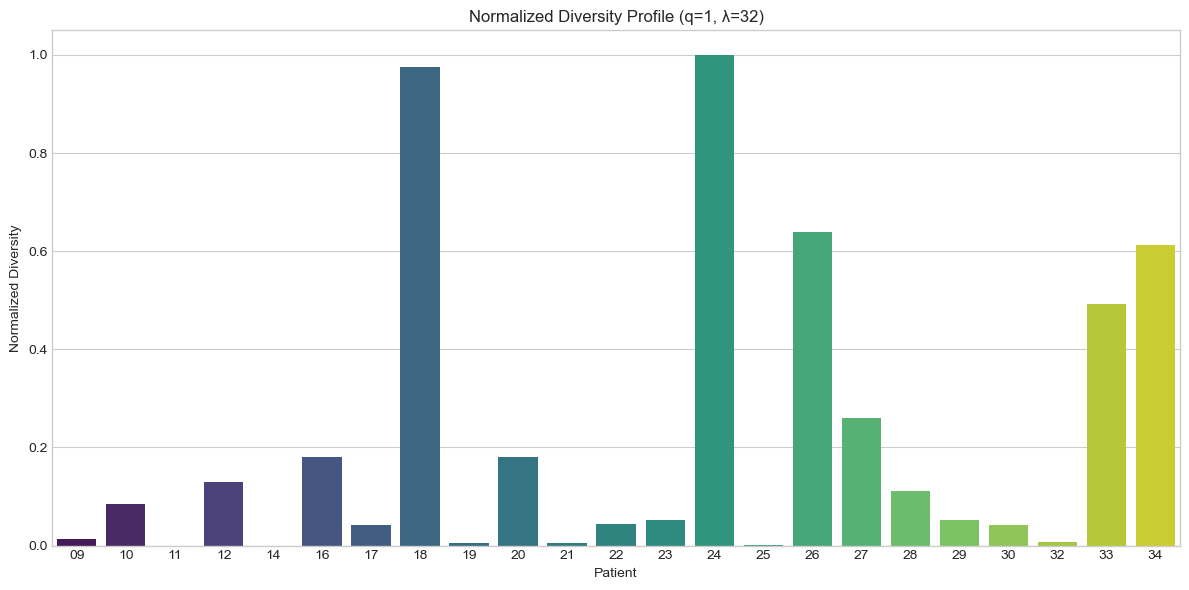

In [1261]:
# Plot the diversity_df_normalized
plt.figure(figsize=(12, 6))
sns.barplot(x='patient', y='B', data=diversity_df_normalized, palette='viridis')
plt.title(f'Normalized Diversity Profile (q={q_fixed}, λ={lambda_fixed})')
plt.xlabel('Patient')
plt.ylabel('Normalized Diversity')
plt.xticks(rotation=0)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels

#### Standardize

In [1262]:
# Create a copy of diversity_df
diversity_df_standardized = diversity_df.copy()

# Calculate mean and std across all patients' B values
mean_b = diversity_df['B'].mean()
std_b = diversity_df['B'].std()

# Standardize: (x - mean) / std
diversity_df_standardized['B'] = (diversity_df['B'] - mean_b) / std_b

# Print the standardized dataframe to check
print(diversity_df_standardized)

   patient         B
0       09 -0.653174
1       10 -0.419506
2       11 -0.693480
3       12 -0.271179
4       14 -0.693647
5       16 -0.108038
6       17 -0.554726
7       18  2.463528
8       19 -0.679836
9       20 -0.110469
10      21 -0.677218
11      22 -0.550034
12      23 -0.524151
13      24  2.542235
14      25 -0.691196
15      26  1.371265
16      27  0.146669
17      28 -0.336044
18      29 -0.527993
19      30 -0.555301
20      32 -0.667838
21      33  0.899957
22      34  1.290178


C:\Users\iipms\AppData\Local\Temp\ipykernel_9004\3197889801.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='patient', y='B', data=diversity_df_standardized, palette='viridis')


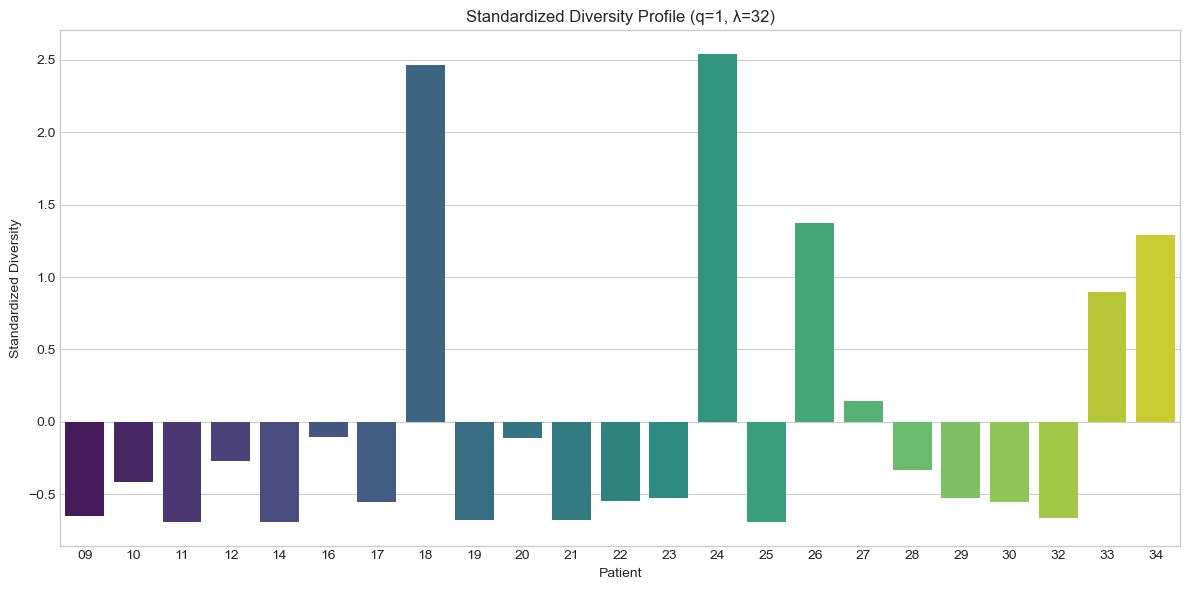

In [1263]:
# Plot the diversity_df_standardized
plt.figure(figsize=(12, 6))
sns.barplot(x='patient', y='B', data=diversity_df_standardized, palette='viridis')
plt.title(f'Standardized Diversity Profile (q={q_fixed}, λ={lambda_fixed})')
plt.xlabel('Patient')
plt.ylabel('Standardized Diversity')
plt.xticks(rotation=0)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels

#### Softmax

In [1264]:
diversity_df_softmax = diversity_df.copy()
# Apply softmax to the 'B' column
diversity_df_softmax['B'] = diversity_df_softmax['B'] / np.sum(diversity_df_softmax['B'])
# Print the softmax dataframe to check
print(diversity_df_softmax)

   patient         B
0       09  0.003336
1       10  0.017697
2       11  0.000859
3       12  0.026813
4       14  0.000849
5       16  0.036839
6       17  0.009387
7       18  0.194878
8       19  0.001698
9       20  0.036689
10      21  0.001859
11      22  0.009675
12      23  0.011266
13      24  0.199715
14      25  0.001000
15      26  0.127752
16      27  0.052492
17      28  0.022826
18      29  0.011030
19      30  0.009351
20      32  0.002435
21      33  0.098787
22      34  0.122768


C:\Users\iipms\AppData\Local\Temp\ipykernel_9004\161067946.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='patient', y='B', data=diversity_df_softmax, palette='viridis')


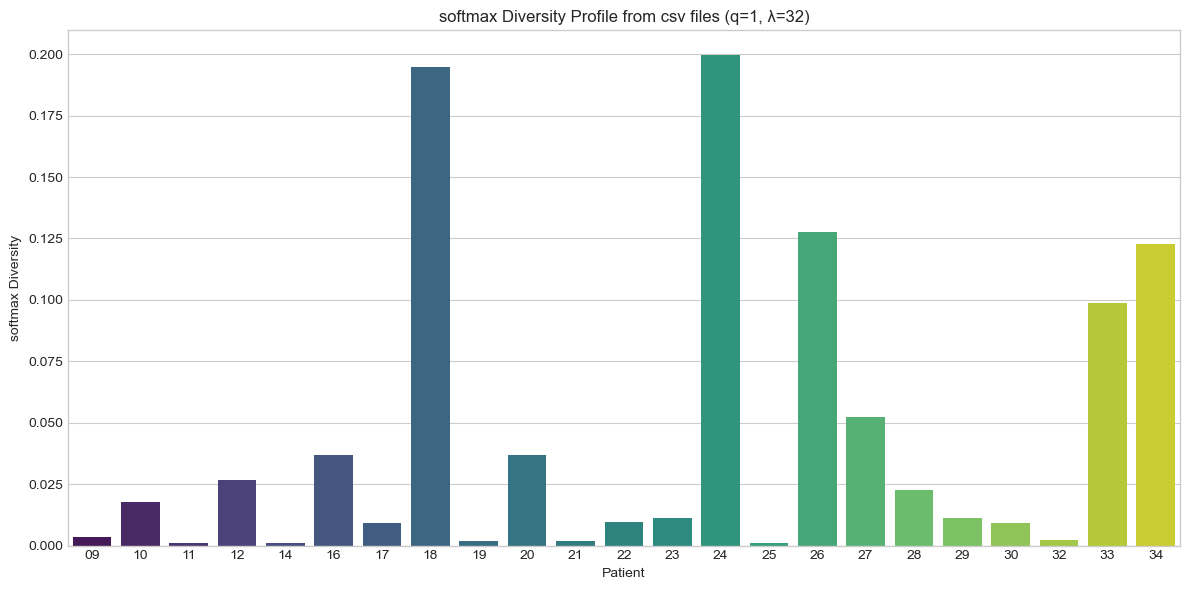

In [1265]:
# Plot the diversity_df_softmax
plt.figure(figsize=(12, 6))
sns.barplot(x='patient', y='B', data=diversity_df_softmax, palette='viridis')
plt.title(f'softmax Diversity Profile from csv files (q={q_fixed}, λ={lambda_fixed})')
plt.xlabel('Patient')
plt.ylabel('softmax Diversity')
plt.xticks(rotation=0)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels

### Vlnplot by Softmax

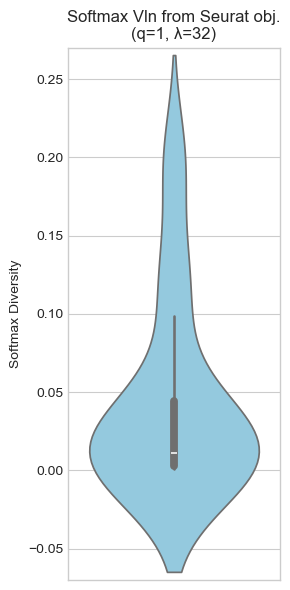

In [1266]:
import seaborn as sns

import matplotlib.pyplot as plt

# Draw a violin plot for diversity_df_softmax['B']
plt.figure(figsize=(3, 6))
sns.violinplot(y=diversity_df_softmax['B'], color='skyblue')
plt.title(f'Softmax Vln from Seurat obj.\n(q={q_fixed}, λ={lambda_fixed})')
plt.ylabel('Softmax Diversity')
plt.ylim(-0.07, 0.27)   # Limit the y-axis range
plt.tight_layout()
plt.show()